# Этап 1. Загрузка и первичный осмотр

## 1.1. Загрузка данных

**Метод:** `fetch_lenta()` из библиотеки `scikit-uplift`.

**Зачем:** Датасет загружается из специализированной библиотеки для uplift-моделирования, которая автоматически разделяет данные на три компонента:
- `data` — матрица признаков (X) — характеристики клиентов до кампании
- `target` — целевая переменная (Y) — визит в магазин (0/1)
- `treatment` — флаг группы — получил ли клиент маркетинговую рассылку

**Почему важно разделение:** В uplift-моделировании необходимо строго отделять treatment и target от признаков, чтобы избежать data leakage (утечки данных из будущего в модель).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklift.datasets import fetch_lenta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = fetch_lenta()

data = dataset.data
target = dataset.target
treatment = dataset.treatment

In [3]:
print(dataset.DESCR)

Lenta Uplift Modeling Dataset

Data description
################

An uplift modeling dataset containing data about Lenta's customers grociery shopping and related marketing campaigns.

Source: **BigTarget Hackathon** hosted by Lenta and Microsoft in summer 2020.

Fields
################

Major features:

    * ``group`` (str): treatment/control group flag
    * ``response_att`` (binary): target
    * ``gender`` (str): customer gender
    * ``age`` (float): customer age
    * ``main_format`` (int): store type (1 - grociery store, 0 - superstore)


.. list-table::
    :align: center
    :header-rows: 1
    :widths: 5 5

    * - Feature
      - Description
    * - CardHolder
      - customer id
    * - customer
      - age
    * - children
      - number of children
    * - cheque_count_[3,6,12]m_g*
      - number of customer receipts collected within last 3, 6, 12 months
        before campaign. g* is a product group
    * - crazy_purchases_cheque_count_[1,3,6,12]m
      - number of cust

In [4]:
print('Признаки:', dataset.feature_names)
print(f'\nTarget: {dataset.target_name}')
print(f'Treatment: {dataset.treatment_name}')

Признаки: ['age', 'cheque_count_12m_g20', 'cheque_count_12m_g21', 'cheque_count_12m_g25', 'cheque_count_12m_g32', 'cheque_count_12m_g33', 'cheque_count_12m_g38', 'cheque_count_12m_g39', 'cheque_count_12m_g41', 'cheque_count_12m_g42', 'cheque_count_12m_g45', 'cheque_count_12m_g46', 'cheque_count_12m_g48', 'cheque_count_12m_g52', 'cheque_count_12m_g56', 'cheque_count_12m_g57', 'cheque_count_12m_g58', 'cheque_count_12m_g79', 'cheque_count_3m_g20', 'cheque_count_3m_g21', 'cheque_count_3m_g25', 'cheque_count_3m_g42', 'cheque_count_3m_g45', 'cheque_count_3m_g52', 'cheque_count_3m_g56', 'cheque_count_3m_g57', 'cheque_count_3m_g79', 'cheque_count_6m_g20', 'cheque_count_6m_g21', 'cheque_count_6m_g25', 'cheque_count_6m_g32', 'cheque_count_6m_g33', 'cheque_count_6m_g38', 'cheque_count_6m_g39', 'cheque_count_6m_g40', 'cheque_count_6m_g41', 'cheque_count_6m_g42', 'cheque_count_6m_g45', 'cheque_count_6m_g46', 'cheque_count_6m_g48', 'cheque_count_6m_g52', 'cheque_count_6m_g56', 'cheque_count_6m_g57',

## 1.2. Размер и структура

**Методы:** `shape`, `dtypes`, `head()`, `info()`, `describe()`.

**Зачем:**
- `shape` — понять масштаб данных (сколько строк/столбцов), чтобы оценить вычислительную сложность
- `dtypes` — определить типы признаков (числовые, категориальные, бинарные), от этого зависит выбор методов анализа и предобработки
- `head(10)` — визуальный осмотр первых строк для понимания формата и содержания данных
- `info()` — количество non-null значений по каждому столбцу (быстрая оценка пропусков) + потребление памяти
- `describe()` — базовая статистика (min, max, mean, std, квартили) для числовых признаков; для категориальных — unique, top, freq. Позволяет быстро обнаружить аномалии (отрицательные значения, нулевые std и т.д.)

In [5]:
print(f'Размер данных: {data.shape[0]} строк, {data.shape[1]} столбцов')
print(f'Target: {target.shape[0]} значений')
print(f'Treatment: {treatment.shape[0]} значений')

Размер данных: 687029 строк, 193 столбцов
Target: 687029 значений
Treatment: 687029 значений


In [6]:
# Типы данных
data.dtypes

age                              float64
cheque_count_12m_g20             float64
cheque_count_12m_g21             float64
cheque_count_12m_g25             float64
cheque_count_12m_g32             float64
                                  ...   
sale_sum_6m_g44                  float64
sale_sum_6m_g54                  float64
stdev_days_between_visits_15d    float64
stdev_discount_depth_15d         float64
stdev_discount_depth_1m          float64
Length: 193, dtype: object

In [7]:
data.head(10)

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,cheque_count_12m_g45,cheque_count_12m_g46,cheque_count_12m_g48,cheque_count_12m_g52,cheque_count_12m_g56,cheque_count_12m_g57,cheque_count_12m_g58,cheque_count_12m_g79,cheque_count_3m_g20,cheque_count_3m_g21,cheque_count_3m_g25,cheque_count_3m_g42,cheque_count_3m_g45,cheque_count_3m_g52,cheque_count_3m_g56,cheque_count_3m_g57,cheque_count_3m_g79,cheque_count_6m_g20,cheque_count_6m_g21,cheque_count_6m_g25,cheque_count_6m_g32,cheque_count_6m_g33,cheque_count_6m_g38,cheque_count_6m_g39,cheque_count_6m_g40,cheque_count_6m_g41,cheque_count_6m_g42,cheque_count_6m_g45,cheque_count_6m_g46,cheque_count_6m_g48,cheque_count_6m_g52,cheque_count_6m_g56,cheque_count_6m_g57,cheque_count_6m_g58,cheque_count_6m_g79,children,crazy_purchases_cheque_count_12m,crazy_purchases_cheque_count_1m,crazy_purchases_cheque_count_3m,crazy_purchases_cheque_count_6m,crazy_purchases_goods_count_12m,crazy_purchases_goods_count_6m,disc_sum_6m_g34,food_share_15d,food_share_1m,gender,k_var_cheque_15d,k_var_cheque_3m,k_var_cheque_category_width_15d,k_var_cheque_group_width_15d,k_var_count_per_cheque_15d_g24,k_var_count_per_cheque_15d_g34,k_var_count_per_cheque_1m_g24,k_var_count_per_cheque_1m_g27,k_var_count_per_cheque_1m_g34,k_var_count_per_cheque_1m_g44,k_var_count_per_cheque_1m_g49,k_var_count_per_cheque_3m_g24,k_var_count_per_cheque_3m_g27,k_var_count_per_cheque_3m_g32,k_var_count_per_cheque_3m_g34,k_var_count_per_cheque_3m_g41,k_var_count_per_cheque_3m_g44,k_var_count_per_cheque_6m_g24,k_var_count_per_cheque_6m_g27,k_var_count_per_cheque_6m_g32,k_var_count_per_cheque_6m_g44,k_var_days_between_visits_15d,k_var_days_between_visits_1m,k_var_days_between_visits_3m,k_var_disc_per_cheque_15d,k_var_disc_share_12m_g32,k_var_disc_share_15d_g24,k_var_disc_share_15d_g34,k_var_disc_share_15d_g49,k_var_disc_share_1m_g24,k_var_disc_share_1m_g27,k_var_disc_share_1m_g34,k_var_disc_share_1m_g40,k_var_disc_share_1m_g44,k_var_disc_share_1m_g49,k_var_disc_share_1m_g54,k_var_disc_share_3m_g24,k_var_disc_share_3m_g26,k_var_disc_share_3m_g27,k_var_disc_share_3m_g32,k_var_disc_share_3m_g33,k_var_disc_share_3m_g34,k_var_disc_share_3m_g38,k_var_disc_share_3m_g40,k_var_disc_share_3m_g41,k_var_disc_share_3m_g44,k_var_disc_share_3m_g46,k_var_disc_share_3m_g48,k_var_disc_share_3m_g49,k_var_disc_share_3m_g54,k_var_disc_share_6m_g24,k_var_disc_share_6m_g27,k_var_disc_share_6m_g32,k_var_disc_share_6m_g34,k_var_disc_share_6m_g44,k_var_disc_share_6m_g46,k_var_disc_share_6m_g49,k_var_disc_share_6m_g54,k_var_discount_depth_15d,k_var_discount_depth_1m,k_var_sku_per_cheque_15d,k_var_sku_price_12m_g32,k_var_sku_price_15d_g34,k_var_sku_price_15d_g49,k_var_sku_price_1m_g24,k_var_sku_price_1m_g26,k_var_sku_price_1m_g27,k_var_sku_price_1m_g34,k_var_sku_price_1m_g40,k_var_sku_price_1m_g44,k_var_sku_price_1m_g49,k_var_sku_price_1m_g54,k_var_sku_price_3m_g24,k_var_sku_price_3m_g26,k_var_sku_price_3m_g27,k_var_sku_price_3m_g32,k_var_sku_price_3m_g33,k_var_sku_price_3m_g34,k_var_sku_price_3m_g40,k_var_sku_price_3m_g41,k_var_sku_price_3m_g44,k_var_sku_price_3m_g46,k_var_sku_price_3m_g48,k_var_sku_price_3m_g49,k_var_sku_price_3m_g54,k_var_sku_price_6m_g24,k_var_sku_price_6m_g26,k_var_sku_price_6m_g27,k_var_sku_price_6m_g32,k_var_sku_price_6m_g41,k_var_sku_price_6m_g42,k_var_sku_price_6m_g44,k_var_sku_price_6m_g48,k_var_sku_price_6m_g49,main_format,mean_discount_depth_15d,months_from_register,perdelta_days_between_visits_15_30d,promo_share_15d,response_sms,response_viber,sale_count_12m_g32,sale_count_12m_g33,sale_count_12m_g49,sale_count_12m_g54,sale_count_12m_g57,sale_count_3m_g24,sale_count_3m_g33,sale_count_3m_g57,sale_count_6m_g24,sale_count_6m_g25,sale_count_6m_g32,sale_count_6m_g33,sale_count_6m_g44,sale_count_6m_g54,sale_count_6m_g57,sale_sum_12m_g24,sale_sum_12m_g25,sale_sum_12m_g26,sale_sum_12m_g27,sale_sum_12m_

In [8]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 687029 entries, 0 to 687028
Columns: 193 entries, age to stdev_discount_depth_1m
dtypes: float64(191), int64(1), str(1)
memory usage: 1013.0 MB


In [9]:
# Описательная статистика числовых признаков
data.describe()

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,cheque_count_12m_g45,cheque_count_12m_g46,cheque_count_12m_g48,cheque_count_12m_g52,cheque_count_12m_g56,cheque_count_12m_g57,cheque_count_12m_g58,cheque_count_12m_g79,cheque_count_3m_g20,cheque_count_3m_g21,cheque_count_3m_g25,cheque_count_3m_g42,cheque_count_3m_g45,cheque_count_3m_g52,cheque_count_3m_g56,cheque_count_3m_g57,cheque_count_3m_g79,cheque_count_6m_g20,cheque_count_6m_g21,cheque_count_6m_g25,cheque_count_6m_g32,cheque_count_6m_g33,cheque_count_6m_g38,cheque_count_6m_g39,cheque_count_6m_g40,cheque_count_6m_g41,cheque_count_6m_g42,cheque_count_6m_g45,cheque_count_6m_g46,cheque_count_6m_g48,cheque_count_6m_g52,cheque_count_6m_g56,cheque_count_6m_g57,cheque_count_6m_g58,cheque_count_6m_g79,children,crazy_purchases_cheque_count_12m,crazy_purchases_cheque_count_1m,crazy_purchases_cheque_count_3m,crazy_purchases_cheque_count_6m,crazy_purchases_goods_count_12m,crazy_purchases_goods_count_6m,disc_sum_6m_g34,food_share_15d,food_share_1m,k_var_cheque_15d,k_var_cheque_3m,k_var_cheque_category_width_15d,k_var_cheque_group_width_15d,k_var_count_per_cheque_15d_g24,k_var_count_per_cheque_15d_g34,k_var_count_per_cheque_1m_g24,k_var_count_per_cheque_1m_g27,k_var_count_per_cheque_1m_g34,k_var_count_per_cheque_1m_g44,k_var_count_per_cheque_1m_g49,k_var_count_per_cheque_3m_g24,k_var_count_per_cheque_3m_g27,k_var_count_per_cheque_3m_g32,k_var_count_per_cheque_3m_g34,k_var_count_per_cheque_3m_g41,k_var_count_per_cheque_3m_g44,k_var_count_per_cheque_6m_g24,k_var_count_per_cheque_6m_g27,k_var_count_per_cheque_6m_g32,k_var_count_per_cheque_6m_g44,k_var_days_between_visits_15d,k_var_days_between_visits_1m,k_var_days_between_visits_3m,k_var_disc_per_cheque_15d,k_var_disc_share_12m_g32,k_var_disc_share_15d_g24,k_var_disc_share_15d_g34,k_var_disc_share_15d_g49,k_var_disc_share_1m_g24,k_var_disc_share_1m_g27,k_var_disc_share_1m_g34,k_var_disc_share_1m_g40,k_var_disc_share_1m_g44,k_var_disc_share_1m_g49,k_var_disc_share_1m_g54,k_var_disc_share_3m_g24,k_var_disc_share_3m_g26,k_var_disc_share_3m_g27,k_var_disc_share_3m_g32,k_var_disc_share_3m_g33,k_var_disc_share_3m_g34,k_var_disc_share_3m_g38,k_var_disc_share_3m_g40,k_var_disc_share_3m_g41,k_var_disc_share_3m_g44,k_var_disc_share_3m_g46,k_var_disc_share_3m_g48,k_var_disc_share_3m_g49,k_var_disc_share_3m_g54,k_var_disc_share_6m_g24,k_var_disc_share_6m_g27,k_var_disc_share_6m_g32,k_var_disc_share_6m_g34,k_var_disc_share_6m_g44,k_var_disc_share_6m_g46,k_var_disc_share_6m_g49,k_var_disc_share_6m_g54,k_var_discount_depth_15d,k_var_discount_depth_1m,k_var_sku_per_cheque_15d,k_var_sku_price_12m_g32,k_var_sku_price_15d_g34,k_var_sku_price_15d_g49,k_var_sku_price_1m_g24,k_var_sku_price_1m_g26,k_var_sku_price_1m_g27,k_var_sku_price_1m_g34,k_var_sku_price_1m_g40,k_var_sku_price_1m_g44,k_var_sku_price_1m_g49,k_var_sku_price_1m_g54,k_var_sku_price_3m_g24,k_var_sku_price_3m_g26,k_var_sku_price_3m_g27,k_var_sku_price_3m_g32,k_var_sku_price_3m_g33,k_var_sku_price_3m_g34,k_var_sku_price_3m_g40,k_var_sku_price_3m_g41,k_var_sku_price_3m_g44,k_var_sku_price_3m_g46,k_var_sku_price_3m_g48,k_var_sku_price_3m_g49,k_var_sku_price_3m_g54,k_var_sku_price_6m_g24,k_var_sku_price_6m_g26,k_var_sku_price_6m_g27,k_var_sku_price_6m_g32,k_var_sku_price_6m_g41,k_var_sku_price_6m_g42,k_var_sku_price_6m_g44,k_var_sku_price_6m_g48,k_var_sku_price_6m_g49,main_format,mean_discount_depth_15d,months_from_register,perdelta_days_between_visits_15_30d,promo_share_15d,response_sms,response_viber,sale_count_12m_g32,sale_count_12m_g33,sale_count_12m_g49,sale_count_12m_g54,sale_count_12m_g57,sale_count_3m_g24,sale_count_3m_g33,sale_count_3m_g57,sale_count_6m_g24,sale_count_6m_g25,sale_count_6m_g32,sale_count_6m_g33,sale_count_6m_g44,sale_count_6m_g54,sale_count_6m_g57,sale_sum_12m_g24,sale_sum_12m_g25,sale_sum_12m_g26,sale_sum_12m_g27,sale_sum_12m_g32,sal

In [10]:
# Описательная статистика категориальных признаков
data.describe(include='object')

/var/folders/9q/qy8f19xj1qz8bv3qsy0mvd5w0000gn/T/ipykernel_56722/657881349.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  data.describe(include='object')


,gender
count,678448
unique,3
top,Ж
freq,433448


In [11]:
# Сводная таблица столбцов с типами
col_info = pd.DataFrame({
    'dtype': data.dtypes,
    'non_null': data.notnull().sum(),
    'null_count': data.isnull().sum(),
    'null_pct': (data.isnull().mean() * 100).round(2),
    'nunique': data.nunique(),
})
col_info['category'] = col_info['dtype'].apply(
    lambda d: 'категориальный' if d == 'object' else ('бинарный' if d in ['int64', 'int32'] else 'числовой')
)
col_info

,dtype,non_null,null_count,null_pct,nunique,category
age,float64,675264,11765,1.71,101,числовой
cheque_count_12m_g20,float64,687029,0,0.00,131,числовой
cheque_count_12m_g21,float64,687029,0,0.00,158,числовой
cheque_count_12m_g25,float64,687029,0,0.00,242,числовой
cheque_count_12m_g32,float64,687029,0,0.00,144,числовой
...,...,...,...,...,...,...
sale_sum_6m_g44,float64,683914,3115,0.45,156693,числовой
sale_sum_6m_g54,float64,683914,3115,0.45,145878,числовой
stdev_days_between_visits_15d,float64,610075,76954,11.20,271,числовой
stdev_discount_depth_15d,float64,546576,140453,20.44,6564,числовой


# Этап 2. Анализ целевой переменной и treatment

## 2.1. Распределение treatment (group)

**Метод:** `value_counts()` + барплот.

**Зачем:** Проверить соотношение treatment/control групп. В A/B-тесте важно знать пропорцию: при сильном дисбалансе (например, 99/1) оценки uplift будут неустойчивыми из-за малого размера контрольной группы. Барплот даёт визуальное представление о дисбалансе.

In [12]:
print('Абсолютные частоты:')
print(treatment.value_counts())
print('\nОтносительные частоты:')
print(treatment.value_counts(normalize=True).round(4))

Абсолютные частоты:
group
test       515892
control    171137
Name: count, dtype: int64

Относительные частоты:
group
test       0.7509
control    0.2491
Name: proportion, dtype: float64


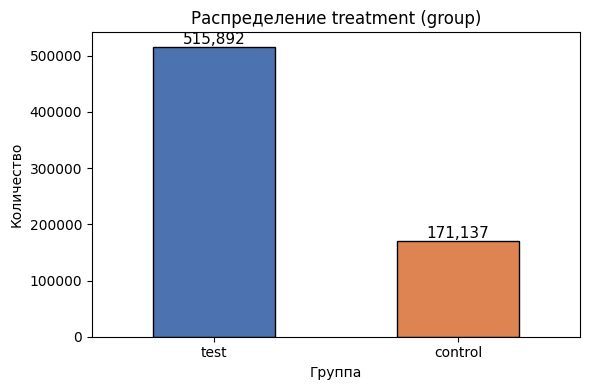

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
treatment.value_counts().plot.bar(ax=ax, color=['#4C72B0', '#DD8452'], edgecolor='black')
ax.set_title('Распределение treatment (group)')
ax.set_xlabel('Группа')
ax.set_ylabel('Количество')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2.2. Распределение target (response_att)

**Метод:** `value_counts()`, `mean()` + барплот.

**Зачем:** Определить **conversion rate** (долю положительного класса) и степень дисбаланса классов. При сильном дисбалансе (CR ~10%) стандартные метрики вроде accuracy бесполезны — модель, предсказывающая всем 0, получит 90% accuracy. Это определяет выбор метрик оценки (нужны uplift-специфичные: AUUC, Qini).

In [14]:
print('Абсолютные частоты:')
print(target.value_counts())
print('\nОтносительные частоты:')
print(target.value_counts(normalize=True).round(4))
print(f'\nConversion rate (доля положительного класса): {target.mean():.4f}')

Абсолютные частоты:
response_att
0    612661
1     74368
Name: count, dtype: int64

Относительные частоты:
response_att
0    0.8918
1    0.1082
Name: proportion, dtype: float64



Conversion rate (доля положительного класса): 0.1082


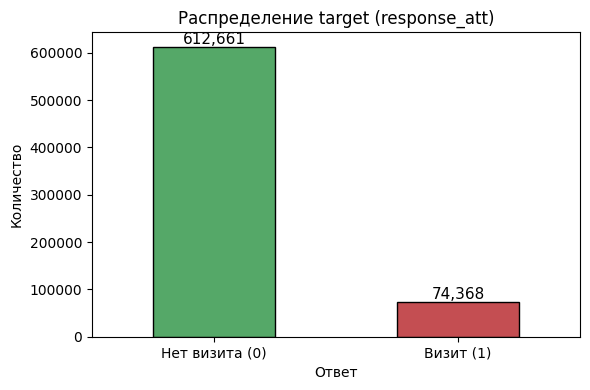

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
target.value_counts().plot.bar(ax=ax, color=['#55A868', '#C44E52'], edgecolor='black')
ax.set_title('Распределение target (response_att)')
ax.set_xlabel('Ответ')
ax.set_ylabel('Количество')
ax.set_xticklabels(['Нет визита (0)', 'Визит (1)'], rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()

## 2.3. Кросс-таблица treatment x target

**Методы:** `pd.crosstab()`, расчёт uplift = CR(treatment) - CR(control).

**Зачем:** Кросс-таблица — ключевой инструмент для оценки **среднего эффекта кампании (ATE)**. Мы вычисляем conversion rate отдельно для treatment и control групп, а разница даёт **общий uplift** — насколько маркетинговая рассылка увеличивает вероятность визита в магазин. Это baseline, который uplift-модель должна превзойти за счёт персонализации (таргетирования на клиентов с наибольшим индивидуальным uplift).

In [16]:
print('Абсолютные значения:')
ct = pd.crosstab(treatment, target)
ct.index = ['Control (0)', 'Treatment (1)']
ct.columns = ['Нет визита (0)', 'Визит (1)']
print(ct)

print('\nПропорции (conversion rate по группам):')
ct_norm = pd.crosstab(treatment, target, normalize='index').round(4)
ct_norm.index = ['Control (0)', 'Treatment (1)']
ct_norm.columns = ['Нет визита (0)', 'Визит (1)']
print(ct_norm)

Абсолютные значения:


               Нет визита (0)  Визит (1)
Control (0)            153582      17555
Treatment (1)          459079      56813

Пропорции (conversion rate по группам):
               Нет визита (0)  Визит (1)
Control (0)            0.8974     0.1026
Treatment (1)          0.8899     0.1101


In [17]:
# Расчёт общего uplift
cr_treatment = target[treatment == 'test'].mean()
cr_control = target[treatment == 'control'].mean()
uplift = cr_treatment - cr_control

print(f'Conversion rate (treatment): {cr_treatment:.4f}')
print(f'Conversion rate (control):   {cr_control:.4f}')
print(f'Общий uplift:                {uplift:.4f} ({uplift*100:.2f} п.п.)')

Conversion rate (treatment): 0.1101
Conversion rate (control):   0.1026
Общий uplift:                0.0075 (0.75 п.п.)


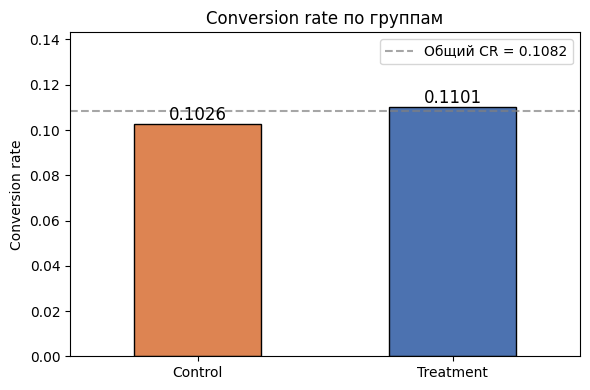


Uplift = 0.0075 → маркетинговая коммуникация повышает conversion rate на 0.75 п.п.


In [18]:
# Визуализация: conversion rate по группам
fig, ax = plt.subplots(figsize=(6, 4))
rates = pd.Series({'Control': cr_control, 'Treatment': cr_treatment})
bars = rates.plot.bar(ax=ax, color=['#DD8452', '#4C72B0'], edgecolor='black')
ax.set_title('Conversion rate по группам')
ax.set_ylabel('Conversion rate')
ax.set_xlabel('')
ax.set_ylim(0, max(cr_treatment, cr_control) * 1.3)
ax.axhline(y=target.mean(), color='gray', linestyle='--', alpha=0.7, label=f'Общий CR = {target.mean():.4f}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f'\nUplift = {uplift:.4f} → маркетинговая коммуникация {"повышает" if uplift > 0 else "снижает"} '
      f'conversion rate на {abs(uplift)*100:.2f} п.п.')

# Этап 3. Анализ признаков (Features)

## 3.1. Пропущенные значения

**Методы:** `isnull().sum()`, `isnull().mean()`, барплот пропусков, группировка по паттернам.

**Зачем:**
- **Количество и доля пропусков** — определить масштаб проблемы и выбрать стратегию обработки (удаление столбца, импутация, или создание флага)
- **Классификация (<5%, 5-30%, >30%)** — признаки с >50% пропусков малоинформативны как значения, но сам факт пропуска может быть полезным сигналом
- **Группировка по паттернам** — если несколько столбцов имеют одинаковое число пропусков, это указывает на общую причину (например, отсутствие покупок в определённый период). Паттерн пропусков может быть информативнее самого значения (MNAR — Missing Not At Random)

In [19]:
# Пропуски по каждому столбцу
null_counts = data.isnull().sum()
null_pct = (data.isnull().mean() * 100).round(2)

null_df = pd.DataFrame({
    'null_count': null_counts,
    'null_pct': null_pct,
}).query('null_count > 0').sort_values('null_pct', ascending=False)

# Классификация
null_df['категория'] = pd.cut(
    null_df['null_pct'],
    bins=[-1, 5, 30, 100],
    labels=['мало (<5%)', 'умеренно (5–30%)', 'много (>30%)']
)

print(f'Столбцов с пропусками: {len(null_df)} из {data.shape[1]}')
print(f'\nРаспределение по категориям:')
print(null_df['категория'].value_counts().to_string())
print()
null_df

Столбцов с пропусками: 153 из 193

Распределение по категориям:
категория
много (>30%)        60
умеренно (5–30%)    53
мало (<5%)          40



,null_count,null_pct,категория
k_var_sku_price_15d_g49,496259,72.23,много (>30%)
k_var_disc_share_15d_g49,496159,72.22,много (>30%)
k_var_sku_price_15d_g34,468551,68.20,много (>30%)
k_var_count_per_cheque_15d_g34,468551,68.20,много (>30%)
k_var_disc_share_15d_g34,468467,68.19,много (>30%)
...,...,...,...
cheque_count_6m_g56,3115,0.45,мало (<5%)
cheque_count_6m_g57,3115,0.45,мало (<5%)
sale_count_6m_g24,3115,0.45,мало (<5%)
cheque_count_6m_g20,3115,0.45,мало (<5%)


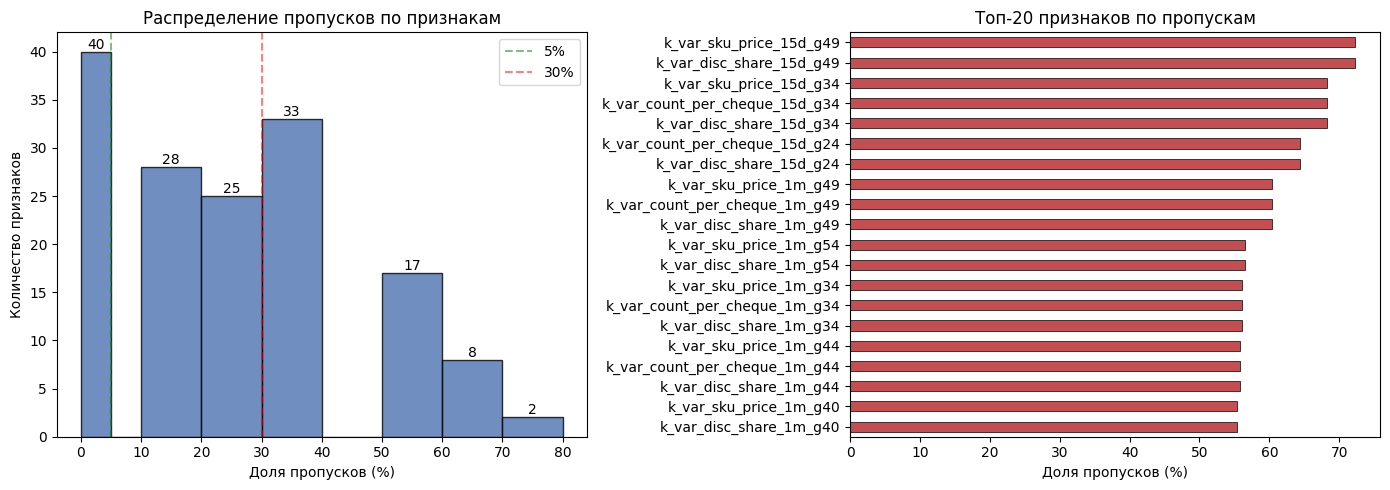

In [20]:
# Визуализация пропусков: гистограмма распределения + топ-20 признаков
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Левый: гистограмма — сколько признаков в каждом диапазоне пропусков
ax = axes[0]
bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80]
counts, edges, patches = ax.hist(null_df['null_pct'], bins=bins, color='#4C72B0', edgecolor='black', alpha=0.8)
for p, count in zip(patches, counts):
    if count > 0:
        ax.annotate(f'{int(count)}', (p.get_x() + p.get_width() / 2, count),
                    ha='center', va='bottom', fontsize=10)
ax.set_xlabel('Доля пропусков (%)')
ax.set_ylabel('Количество признаков')
ax.set_title('Распределение пропусков по признакам')
ax.axvline(x=5, color='green', linestyle='--', alpha=0.5, label='5%')
ax.axvline(x=30, color='red', linestyle='--', alpha=0.5, label='30%')
ax.legend()

# Правый: топ-20 признаков с наибольшей долей пропусков
ax = axes[1]
top_null = null_df.sort_values('null_pct', ascending=True).tail(20)
colors = top_null['null_pct'].apply(lambda x: '#C44E52' if x > 30 else ('#DD8452' if x > 5 else '#55A868'))
top_null['null_pct'].plot.barh(ax=ax, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Доля пропусков (%)')
ax.set_title('Топ-20 признаков по пропускам')

plt.tight_layout()
plt.show()

In [21]:
# Группировка столбцов по количеству пропусков для понимания паттернов
print('Группы столбцов с одинаковым количеством пропусков:')
for count, cols in null_df.groupby('null_count').groups.items():
    if len(cols) > 1:
        print(f'\n  {count:,} пропусков ({count/len(data)*100:.1f}%) — {len(cols)} столбцов:')
        print(f'    {", ".join(cols[:5])}{"..." if len(cols) > 5 else ""}')

Группы столбцов с одинаковым количеством пропусков:

  3,115 пропусков (0.5%) — 32 столбцов:
    cheque_count_6m_g32, sale_count_6m_g54, sale_count_6m_g57, cheque_count_6m_g58, cheque_count_6m_g79...

  8,581 пропусков (1.2%) — 5 столбцов:
    children, gender, response_viber, response_sms, months_from_register

  76,954 пропусков (11.2%) — 2 столбцов:
    k_var_days_between_visits_15d, stdev_days_between_visits_15d

  94,064 пропусков (13.7%) — 16 столбцов:
    cheque_count_3m_g25, cheque_count_3m_g42, cheque_count_3m_g45, cheque_count_3m_g20, cheque_count_3m_g52...

  136,693 пропусков (19.9%) — 4 столбцов:
    k_var_sku_per_cheque_15d, k_var_cheque_group_width_15d, k_var_cheque_category_width_15d, k_var_cheque_15d

  138,801 пропусков (20.2%) — 2 столбцов:
    k_var_sku_price_6m_g32, k_var_count_per_cheque_6m_g32

  140,368 пропусков (20.4%) — 2 столбцов:
    k_var_discount_depth_1m, stdev_discount_depth_1m

  140,453 пропусков (20.4%) — 2 столбцов:
    k_var_discount_depth_15d, std

## 3.2. Числовые признаки

**Методы:** `skew()`, гистограммы, boxplots, KDE (Kernel Density Estimation).

**Зачем:**
- **Скошенность (skewness)** — мера асимметрии распределения. |skew|>1 означает сильно скошенное распределение с тяжёлыми хвостами. Это важно, потому что: (1) выбросы могут искажать средние и т-тесты, (2) линейные модели плохо работают со скошенными данными, (3) может потребоваться winsorization или log-трансформация
- **Гистограммы** — визуальная оценка формы распределения, модальности, наличия пиков
- **Boxplots** — визуализация квартилей и выбросов (точки за пределами 1.5*IQR). Позволяет быстро увидеть, сколько наблюдений являются выбросами
- **KDE по treatment/control** — сравнение распределений признаков между группами. Если распределения различаются, это сигнал о нарушении рандомизации (что проверяется детально в Этапе 4)

In [22]:
# Скошенность всех числовых признаков
numeric_cols = data.select_dtypes(include='number').columns.tolist()
skew_df = data[numeric_cols].skew().sort_values(ascending=False).to_frame('skewness')
skew_df['abs_skew'] = skew_df['skewness'].abs()
skew_df['категория'] = pd.cut(
    skew_df['abs_skew'],
    bins=[-1, 0.5, 1, np.inf],
    labels=['симметричный (|s|<0.5)', 'умеренно скошен (0.5–1)', 'сильно скошен (|s|>1)']
)

print('Распределение скошенности:')
print(skew_df['категория'].value_counts().to_string())
print(f'\nТоп-10 наиболее скошенных:')
skew_df.head(10)

Распределение скошенности:
категория
сильно скошен (|s|>1)      156
умеренно скошен (0.5–1)     28
симметричный (|s|<0.5)       8

Топ-10 наиболее скошенных:


,skewness,abs_skew,категория
sale_sum_12m_g27,326.177456,326.177456,сильно скошен (|s|>1)
sale_count_6m_g44,155.797452,155.797452,сильно скошен (|s|>1)
sale_sum_3m_g33,81.179605,81.179605,сильно скошен (|s|>1)
cheque_count_3m_g79,80.563458,80.563458,сильно скошен (|s|>1)
cheque_count_6m_g79,80.262480,80.262480,сильно скошен (|s|>1)
sale_count_3m_g24,71.763123,71.763123,сильно скошен (|s|>1)
sale_count_6m_g24,71.471232,71.471232,сильно скошен (|s|>1)
sale_sum_3m_g26,65.970325,65.970325,сильно скошен (|s|>1)
sale_sum_3m_g24,64.557808,64.557808,сильно скошен (|s|>1)
sale_sum_6m_g26,63.995369,63.995369,сильно скошен (|s|>1)


### Анализ `age`

In [23]:
# age: описательная статистика и аномалии
print('Описательная статистика age:')
print(data['age'].describe().to_string())
print(f'\nПропуски: {data["age"].isnull().sum()} ({data["age"].isnull().mean()*100:.2f}%)')
print(f'Skewness: {data["age"].skew():.4f}')
print(f'\nАномальные значения:')
print(f'  age == 0: {(data["age"] == 0).sum()}')
print(f'  age < 14: {(data["age"] < 14).sum()}')
print(f'  age > 90: {(data["age"] > 90).sum()}')

Описательная статистика age:
count    675264.000000
mean         43.740718
std          14.842062
min           0.000000
25%          32.000000
50%          42.000000
75%          56.000000
max         100.000000

Пропуски: 11765 (1.71%)
Skewness: 0.3130

Аномальные значения:
  age == 0: 1
  age < 14: 330
  age > 90: 129


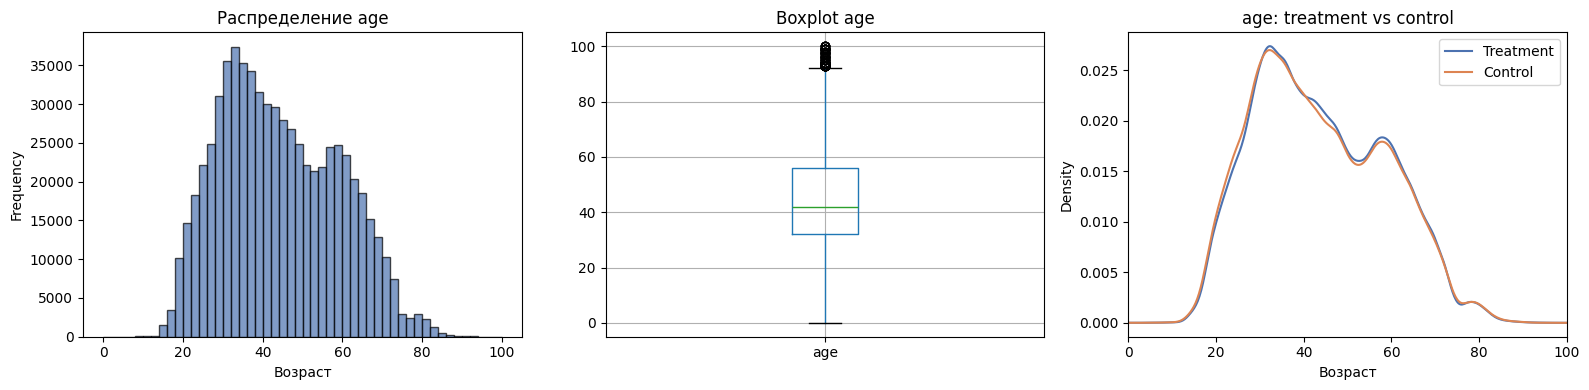

In [24]:
# age: гистограмма + boxplot + KDE по treatment/control
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Гистограмма
data['age'].dropna().plot.hist(bins=50, ax=axes[0], color='#4C72B0', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение age')
axes[0].set_xlabel('Возраст')

# Boxplot
data[['age']].boxplot(ax=axes[1])
axes[1].set_title('Boxplot age')

# KDE по treatment/control
data_with_group = data.copy()
data_with_group['treatment'] = treatment.values
data_with_group.loc[data_with_group['treatment'] == 'test', 'age'].dropna().plot.kde(
    ax=axes[2], label='Treatment', color='#4C72B0')
data_with_group.loc[data_with_group['treatment'] == 'control', 'age'].dropna().plot.kde(
    ax=axes[2], label='Control', color='#DD8452')
axes[2].set_title('age: treatment vs control')
axes[2].set_xlabel('Возраст')
axes[2].legend()
axes[2].set_xlim(0, 100)

plt.tight_layout()
plt.show()

### Ключевые числовые признаки: распределения и выбросы

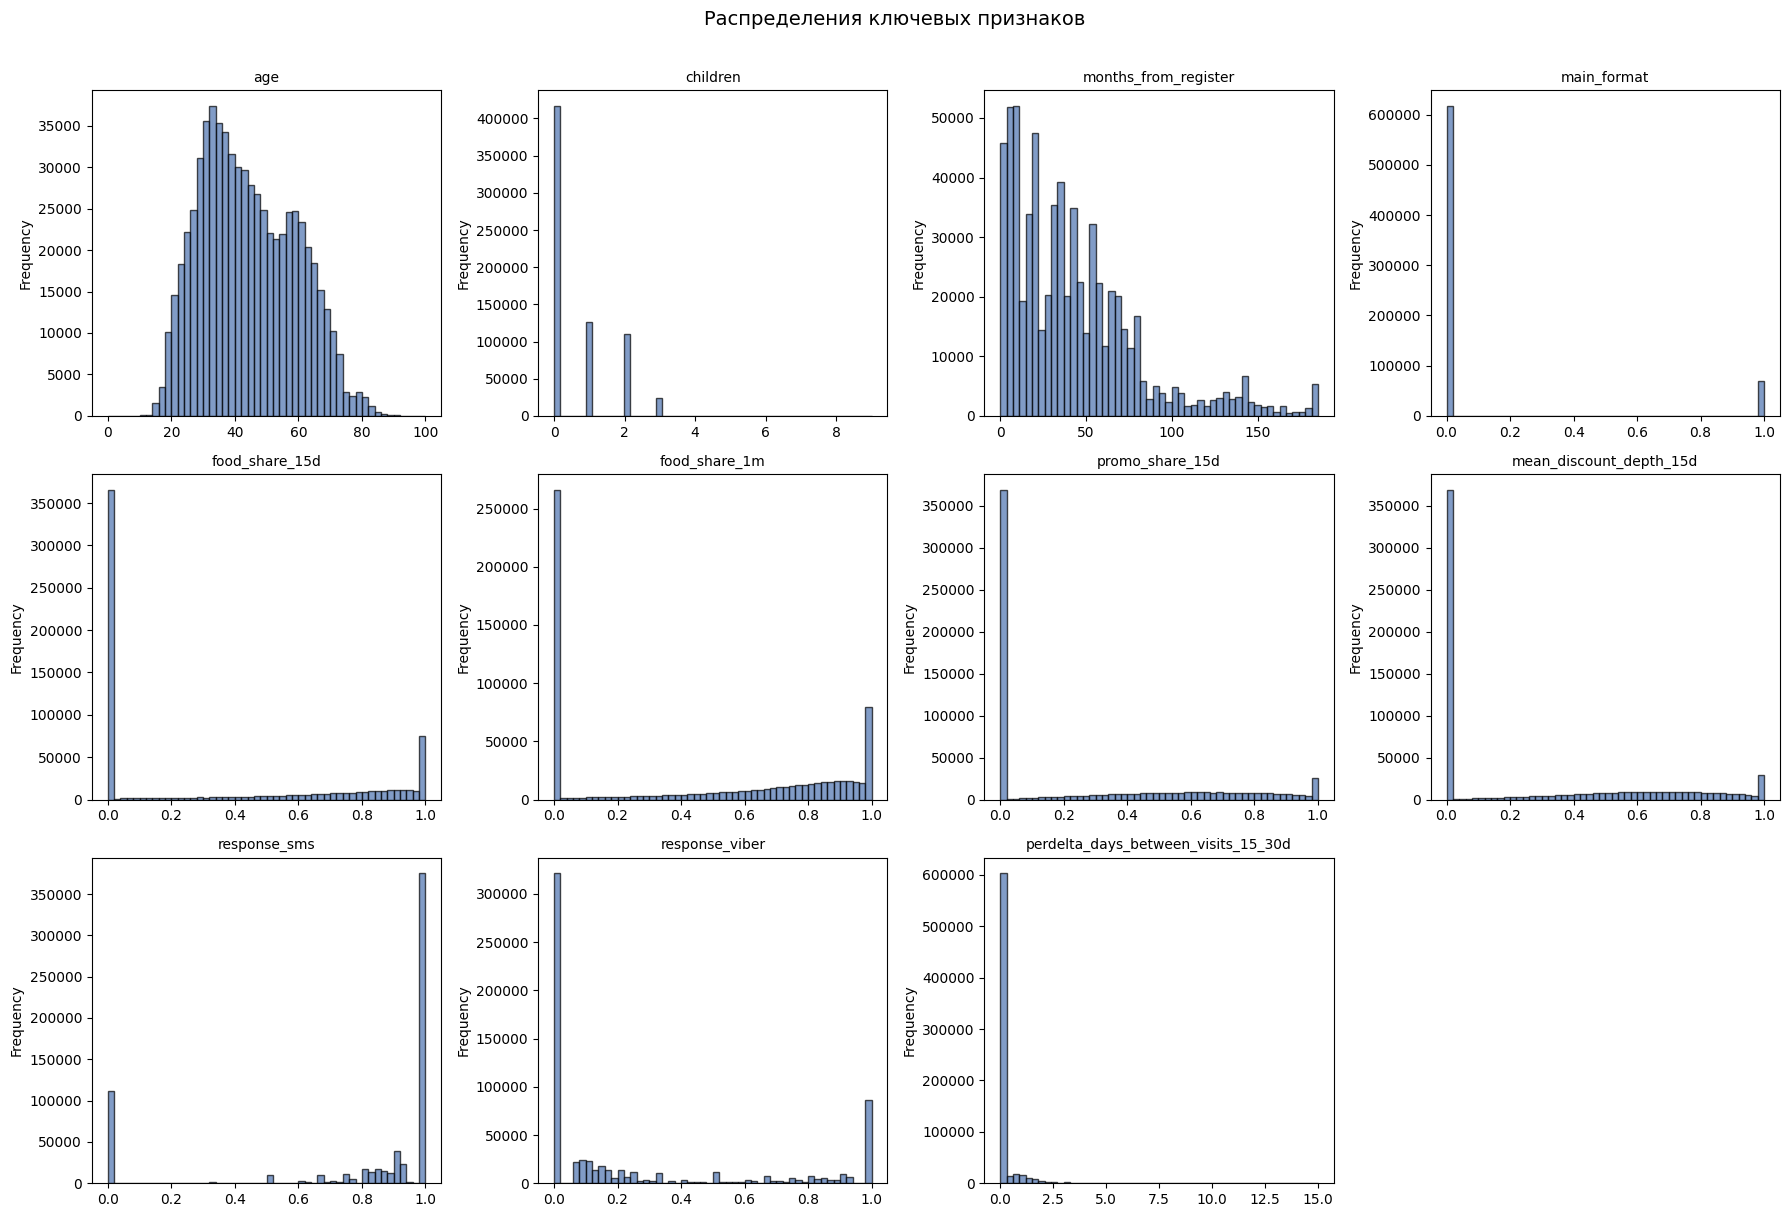

In [25]:
# Ключевые нетехнические признаки для детального анализа
key_features = [
    'age', 'children', 'months_from_register', 'main_format',
    'food_share_15d', 'food_share_1m', 'promo_share_15d',
    'mean_discount_depth_15d', 'response_sms', 'response_viber',
    'perdelta_days_between_visits_15_30d',
]

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(key_features):
    ax = axes[i]
    data[col].dropna().plot.hist(bins=50, ax=ax, color='#4C72B0', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')

# Скрыть лишний subplot
axes[-1].set_visible(False)

plt.suptitle('Распределения ключевых признаков', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

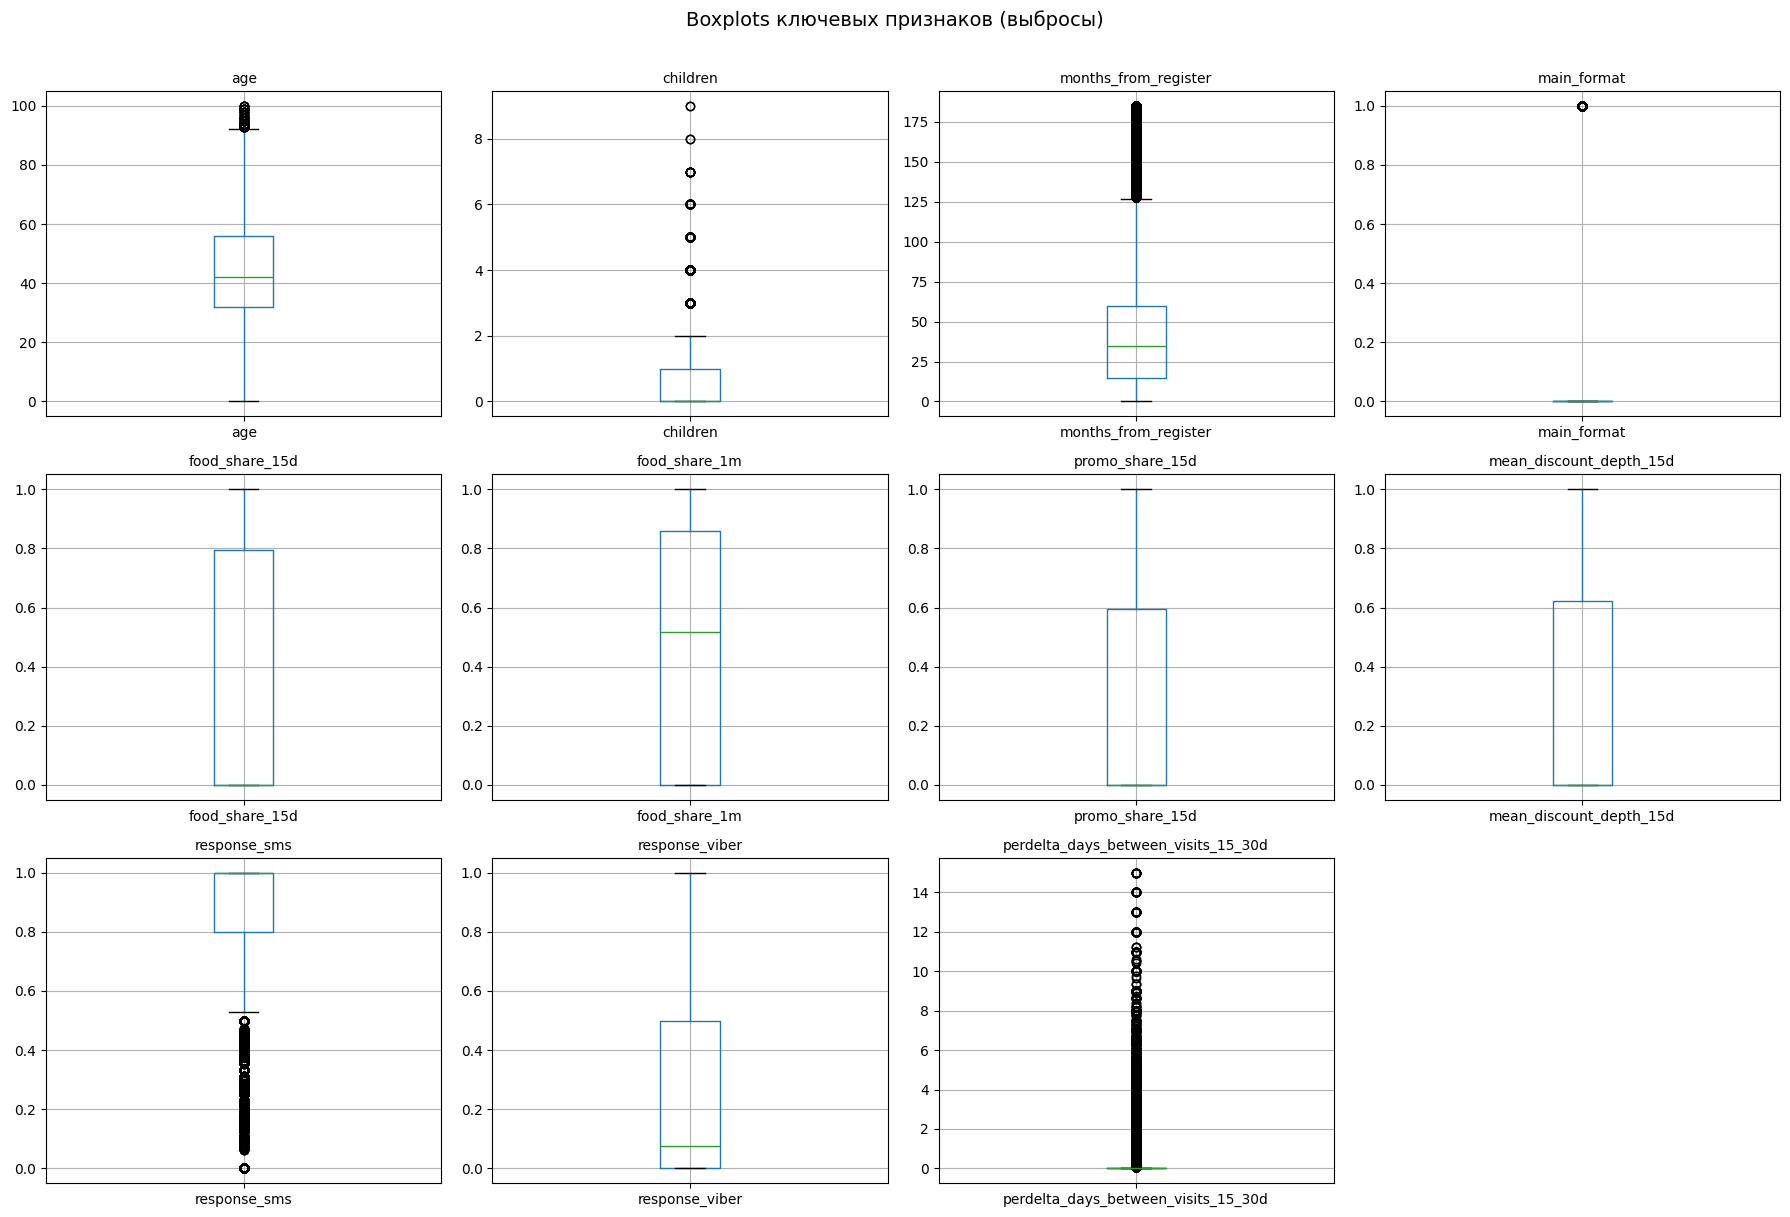

In [26]:
# Boxplots ключевых признаков для обнаружения выбросов
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(key_features):
    ax = axes[i]
    data[[col]].boxplot(ax=ax)
    ax.set_title(col, fontsize=10)

axes[-1].set_visible(False)
plt.suptitle('Boxplots ключевых признаков (выбросы)', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

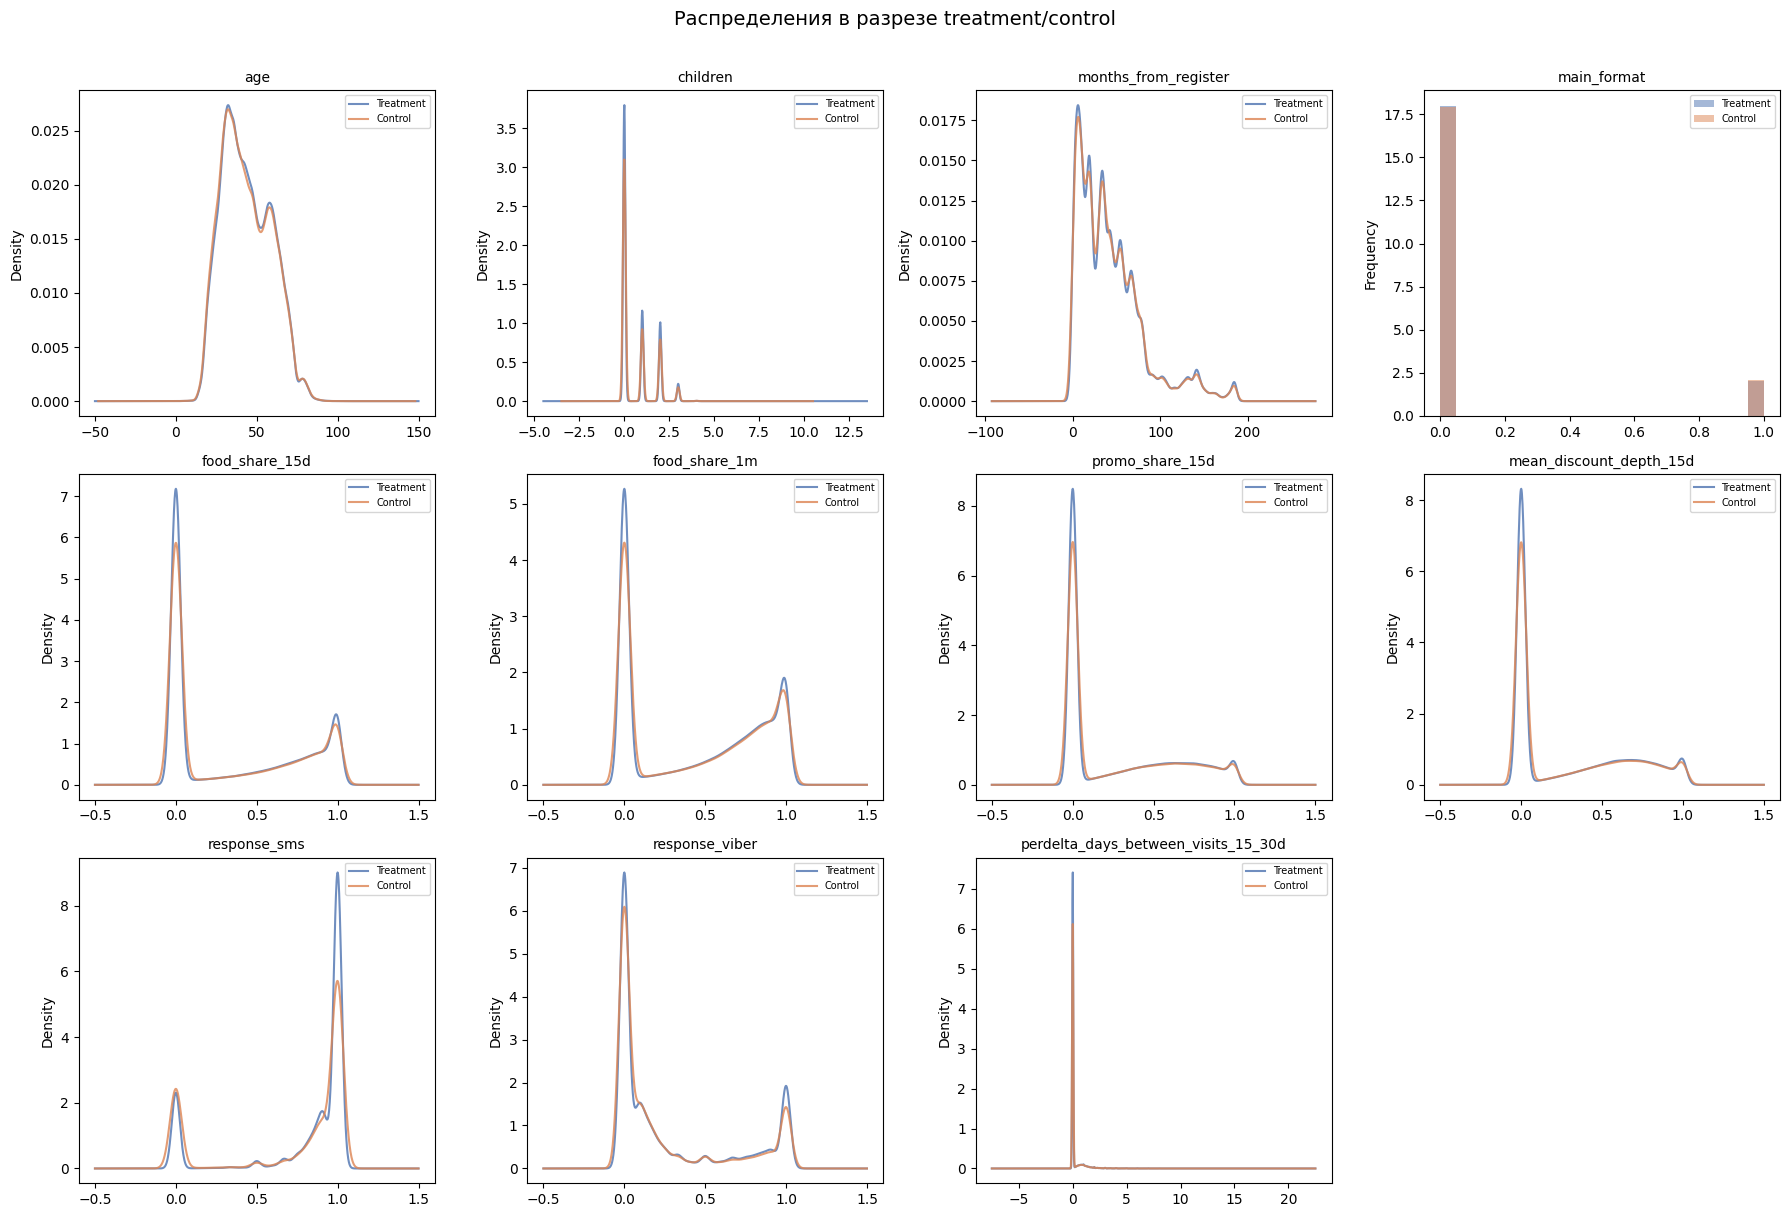

In [27]:
# KDE ключевых признаков в разрезе treatment/control
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

data_with_group = data.copy()
data_with_group['treatment'] = treatment.values

for i, col in enumerate(key_features):
    ax = axes[i]
    for grp, color, label in [('test', '#4C72B0', 'Treatment'), ('control', '#DD8452', 'Control')]:
        vals = data_with_group.loc[data_with_group['treatment'] == grp, col].dropna()
        if vals.nunique() > 2:
            vals.plot.kde(ax=ax, color=color, label=label, alpha=0.8)
        else:
            vals.plot.hist(ax=ax, color=color, label=label, alpha=0.5, density=True, bins=20)
    ax.set_title(col, fontsize=10)
    ax.legend(fontsize=7)
    ax.set_xlabel('')

axes[-1].set_visible(False)
plt.suptitle('Распределения в разрезе treatment/control', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [28]:
# Сводка выбросов: для каждого числового признака — % значений за пределами 1.5*IQR
outlier_stats = []
for col in numeric_cols:
    s = data[col].dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr > 0:
        outliers = ((s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)).mean() * 100
    else:
        outliers = 0
    outlier_stats.append({'feature': col, 'outlier_pct': round(outliers, 2), 'skewness': round(s.skew(), 2)})

outlier_df = pd.DataFrame(outlier_stats).sort_values('outlier_pct', ascending=False)
print(f'Признаки с наибольшей долей выбросов (>5%):')
outlier_df.query('outlier_pct > 5')

Признаки с наибольшей долей выбросов (>5%):


,feature,outlier_pct,skewness
84,k_var_disc_share_1m_g24,24.06,1.94
88,k_var_disc_share_1m_g44,24.05,1.97
61,k_var_count_per_cheque_1m_g24,23.32,1.96
119,k_var_sku_price_1m_g24,23.13,2.30
92,k_var_disc_share_3m_g26,22.97,2.09
...,...,...,...
122,k_var_sku_price_1m_g34,5.47,1.92
39,cheque_count_6m_g48,5.47,57.10
151,months_from_register,5.45,1.43
136,k_var_sku_price_3m_g46,5.33,1.76


## 3.3. Категориальные признаки

**Методы:** `value_counts()`, барплоты частот, grouped barplots по treatment/control.

**Зачем:**
- **Частоты категорий** — обнаружить редкие категории (<1% наблюдений), которые могут вызывать проблемы при кросс-валидации (пустые фолды) и давать нестабильные оценки uplift
- **Распределение по treatment/control** — проверить, что категориальные признаки сбалансированы между группами. Если `gender` или `main_format` распределены по-разному в treatment и control, это confounding, который может исказить оценку эффекта кампании

In [29]:
# gender: частоты и распределение
print('gender — частоты категорий:')
print(data['gender'].value_counts())
print(f'\nПропуски: {data["gender"].isnull().sum()} ({data["gender"].isnull().mean()*100:.2f}%)')
print(f'Уникальных значений: {data["gender"].nunique()}')

gender — частоты категорий:
gender
Ж               433448
М               243910
Не определен      1090
Name: count, dtype: int64

Пропуски: 8581 (1.25%)
Уникальных значений: 3


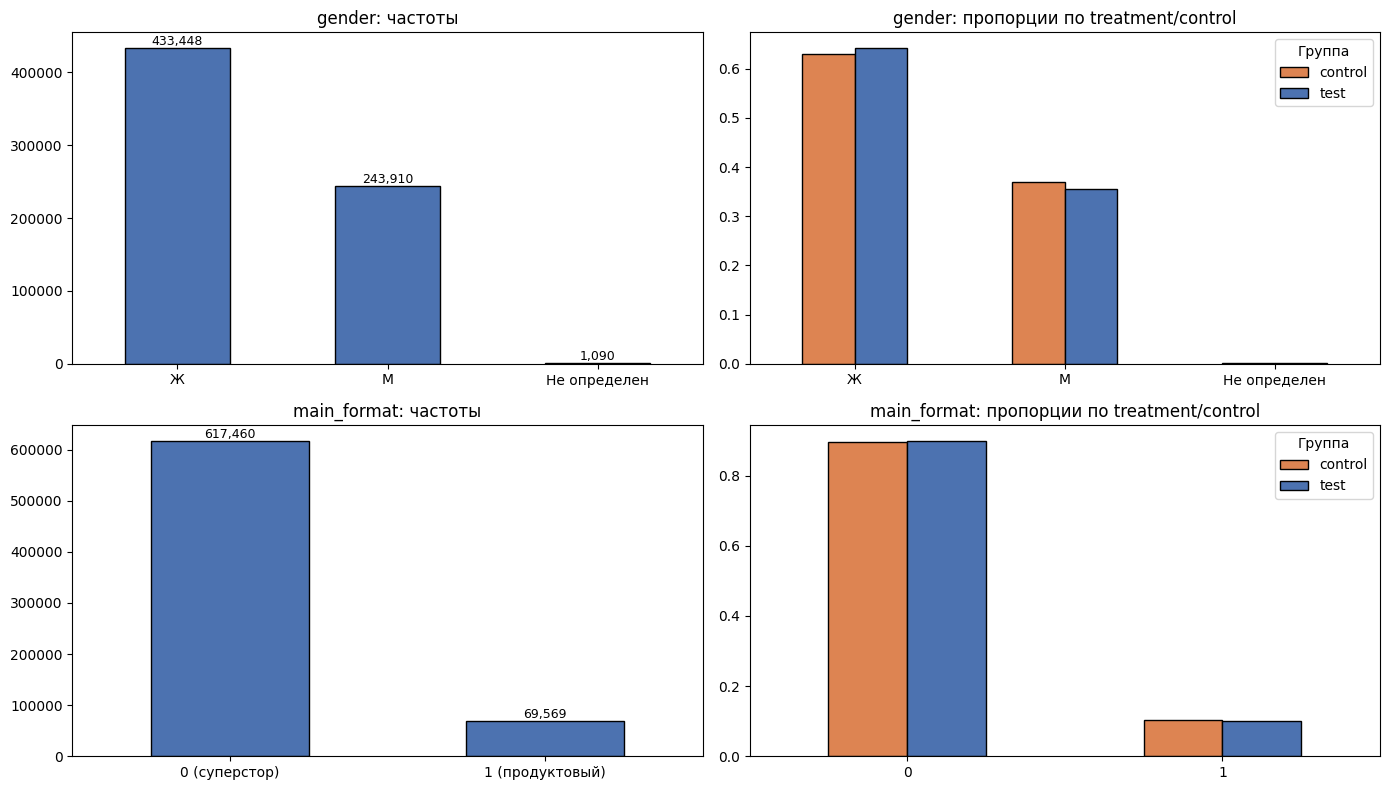

In [30]:
# gender и main_format: barplots + распределение по treatment/control
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# gender — общее
data['gender'].value_counts().plot.bar(ax=axes[0, 0], color='#4C72B0', edgecolor='black')
axes[0, 0].set_title('gender: частоты')
axes[0, 0].set_xlabel('')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='bottom', fontsize=9)
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=0)

# gender — по treatment/control
ct_gender = pd.crosstab(data['gender'], treatment, normalize='columns').round(4)
ct_gender.plot.bar(ax=axes[0, 1], color=['#DD8452', '#4C72B0'], edgecolor='black')
axes[0, 1].set_title('gender: пропорции по treatment/control')
axes[0, 1].set_xlabel('')
axes[0, 1].legend(title='Группа')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=0)

# main_format — общее
data['main_format'].value_counts().plot.bar(ax=axes[1, 0], color='#4C72B0', edgecolor='black')
axes[1, 0].set_title('main_format: частоты')
axes[1, 0].set_xlabel('')
axes[1, 0].set_xticklabels(['0 (суперстор)', '1 (продуктовый)'], rotation=0)
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='bottom', fontsize=9)

# main_format — по treatment/control
ct_format = pd.crosstab(data['main_format'], treatment, normalize='columns').round(4)
ct_format.plot.bar(ax=axes[1, 1], color=['#DD8452', '#4C72B0'], edgecolor='black')
axes[1, 1].set_title('main_format: пропорции по treatment/control')
axes[1, 1].set_xlabel('')
axes[1, 1].legend(title='Группа')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 3.4. Константные и квазиконстантные признаки

**Методы:** `nunique()`, `value_counts(normalize=True)`.

**Зачем:** Признаки, которые принимают одно значение (константные) или одно значение доминирует в >99% случаев (квазиконстантные), не несут полезной информации для модели — они не помогают отличить одного клиента от другого. Их удаление уменьшает размерность и ускоряет обучение без потери качества.

In [31]:
# Константные признаки (nunique == 1)
constant_cols = [col for col in data.columns if data[col].nunique() == 1]
print(f'Константные признаки (nunique=1): {len(constant_cols)}')
if constant_cols:
    print(constant_cols)

# Квазиконстантные признаки (доминирующее значение > 99%)
quasi_const = []
for col in data.columns:
    top_freq = data[col].value_counts(normalize=True).iloc[0] if data[col].nunique() > 0 else 0
    if top_freq > 0.99:
        quasi_const.append({'feature': col, 'top_value': data[col].value_counts().index[0],
                           'top_freq_pct': round(top_freq * 100, 2)})

print(f'\nКвазиконстантные признаки (одно значение > 99%): {len(quasi_const)}')
if quasi_const:
    quasi_df = pd.DataFrame(quasi_const).sort_values('top_freq_pct', ascending=False)
    print(quasi_df.to_string(index=False))
else:
    print('Нет квазиконстантных признаков.')

Константные признаки (nunique=1): 0



Квазиконстантные признаки (одно значение > 99%): 0
Нет квазиконстантных признаков.


## 3.5. Дубликаты

**Метод:** `duplicated()`, группировка дубликатов по target/treatment.

**Зачем:** Полные дубликаты строк могут быть ошибками данных (одна запись дважды) или разными клиентами с одинаковыми признаками. Важно проверить: если дубликаты имеют разные target или treatment, это подтверждает, что это разные клиенты. В uplift-моделировании нельзя удалять «дубликаты», если это реальные разные клиенты — каждое наблюдение ценно для оценки каузального эффекта.

In [32]:
# Полные дубликаты строк
n_dups = data.duplicated().sum()
print(f'Полные дубликаты строк: {n_dups}')

if n_dups > 0:
    # Проверяем — дубликаты с разными target/treatment?
    full = data.copy()
    full['target'] = target.values
    full['treatment'] = treatment.values
    dup_mask = data.duplicated(keep=False)
    dup_rows = full[dup_mask]
    print(f'\nСтрок, участвующих в дубликатах: {dup_mask.sum()}')
    # Проверяем разнообразие target и treatment внутри групп дубликатов
    dup_groups = dup_rows.groupby(list(data.columns)).agg(
        n_rows=('target', 'size'),
        target_vals=('target', 'nunique'),
        treatment_vals=('treatment', 'nunique')
    ).reset_index()
    print(f'Групп дубликатов: {len(dup_groups)}')
    print(f'Из них с разным target: {(dup_groups["target_vals"] > 1).sum()}')
    print(f'Из них с разным treatment: {(dup_groups["treatment_vals"] > 1).sum()}')
    print('\n→ Вероятно разные клиенты с одинаковыми признаками, а не ошибки данных')
else:
    print('→ Дубликатов нет')

Полные дубликаты строк: 30



Строк, участвующих в дубликатах: 56
Групп дубликатов: 0
Из них с разным target: 0
Из них с разным treatment: 0

→ Вероятно разные клиенты с одинаковыми признаками, а не ошибки данных


/var/folders/9q/qy8f19xj1qz8bv3qsy0mvd5w0000gn/T/ipykernel_56722/3362568057.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ).reset_index()
/var/folders/9q/qy8f19xj1qz8bv3qsy0mvd5w0000gn/T/ipykernel_56722/3362568057.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ).reset_index()
/var/folders/9q/qy8f19xj1qz8bv3qsy0mvd5w0000gn/T/ipykernel_56722/3362568057.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

# Этап 4. Проверка рандомизации (Balance Check)

> **Критический этап для uplift modeling. Без него нельзя доверять результатам моделей.**

**Зачем весь этап:** Uplift-моделирование основано на **каузальном выводе** — мы хотим оценить эффект treatment (рассылки), а не просто корреляцию. Для этого необходимо, чтобы treatment и control группы были **сопоставимы** по всем характеристикам (кроме самого treatment). Если рандомизация прошла корректно, средние значения всех признаков должны быть примерно одинаковыми в обеих группах. Если нет — наблюдаемый «эффект» кампании может быть артефактом различий между группами (confounding).

## 4.1. Сравнение средних (числовые признаки)

**Методы:** Welch's t-test, Standardized Mean Difference (SMD).

**Зачем:**
- **t-test** — проверяет, значимо ли различаются средние значения признака в treatment vs control. Нулевая гипотеза: средние равны (рандомизация корректна). Используем Welch's t-test (не предполагает равные дисперсии)
- **SMD** (Standardized Mean Difference = разница средних / pooled std) — мера *практической* значимости различия. В отличие от p-value, SMD не зависит от размера выборки. При большом N (687K) даже крошечные различия дают p<0.05, но только |SMD|>0.1 считается практически значимым
- **Почему оба:** p-value показывает статистическую значимость, SMD — практическую. Для нашей выборки (687K) p-value почти всегда <0.05, поэтому ориентируемся на SMD

In [33]:
from scipy import stats

numeric_cols = data.select_dtypes(include='number').columns.tolist()
treatment_mask = treatment == 'test'
control_mask = treatment == 'control'

balance_results = []
for col in numeric_cols:
    t_vals = data.loc[treatment_mask, col].dropna()
    c_vals = data.loc[control_mask, col].dropna()

    mean_t = t_vals.mean()
    mean_c = c_vals.mean()

    # t-test
    stat, pval = stats.ttest_ind(t_vals, c_vals, equal_var=False)

    # SMD (Standardized Mean Difference)
    pooled_std = np.sqrt((t_vals.std()**2 + c_vals.std()**2) / 2)
    smd = (mean_t - mean_c) / pooled_std if pooled_std > 0 else 0

    balance_results.append({
        'feature': col,
        'mean_treatment': round(mean_t, 4),
        'mean_control': round(mean_c, 4),
        'diff': round(mean_t - mean_c, 4),
        'smd': round(smd, 4),
        'p_value': round(pval, 6),
        'significant': pval < 0.05,
    })

balance_df = pd.DataFrame(balance_results).sort_values('p_value')
print(f'Значимые различия (p < 0.05): {balance_df["significant"].sum()} из {len(balance_df)}')
print(f'|SMD| > 0.1 (практически значимо): {(balance_df["smd"].abs() > 0.1).sum()}')
print(f'\nПризнаки с наименьшим p-value:')
balance_df.head(20)

Значимые различия (p < 0.05): 154 из 192
|SMD| > 0.1 (практически значимо): 1

Признаки с наименьшим p-value:


,feature,mean_treatment,mean_control,diff,smd,p_value,significant
0,age,43.8168,43.5113,0.3056,0.0205,0.0,True
63,k_var_count_per_cheque_1m_g34,0.2185,0.2102,0.0083,0.0253,0.0,True
68,k_var_count_per_cheque_3m_g32,0.1098,0.1057,0.0042,0.0172,0.0,True
69,k_var_count_per_cheque_3m_g34,0.3319,0.3249,0.0070,0.0191,0.0,True
50,crazy_purchases_goods_count_12m,4.2438,4.0377,0.2061,0.0244,0.0,True
46,crazy_purchases_cheque_count_12m,2.5204,2.4063,0.1141,0.0249,0.0,True
86,k_var_disc_share_1m_g34,0.2625,0.2532,0.0092,0.0224,0.0,True
92,k_var_disc_share_3m_g26,0.1968,0.1898,0.0070,0.0182,0.0,True
190,stdev_discount_depth_15d,0.0704,0.0685,0.0020,0.0158,0.0,True
49,crazy_purchases_cheque_count_6m,1.0788,1.0293,0.0495,0.0232,0.0,True


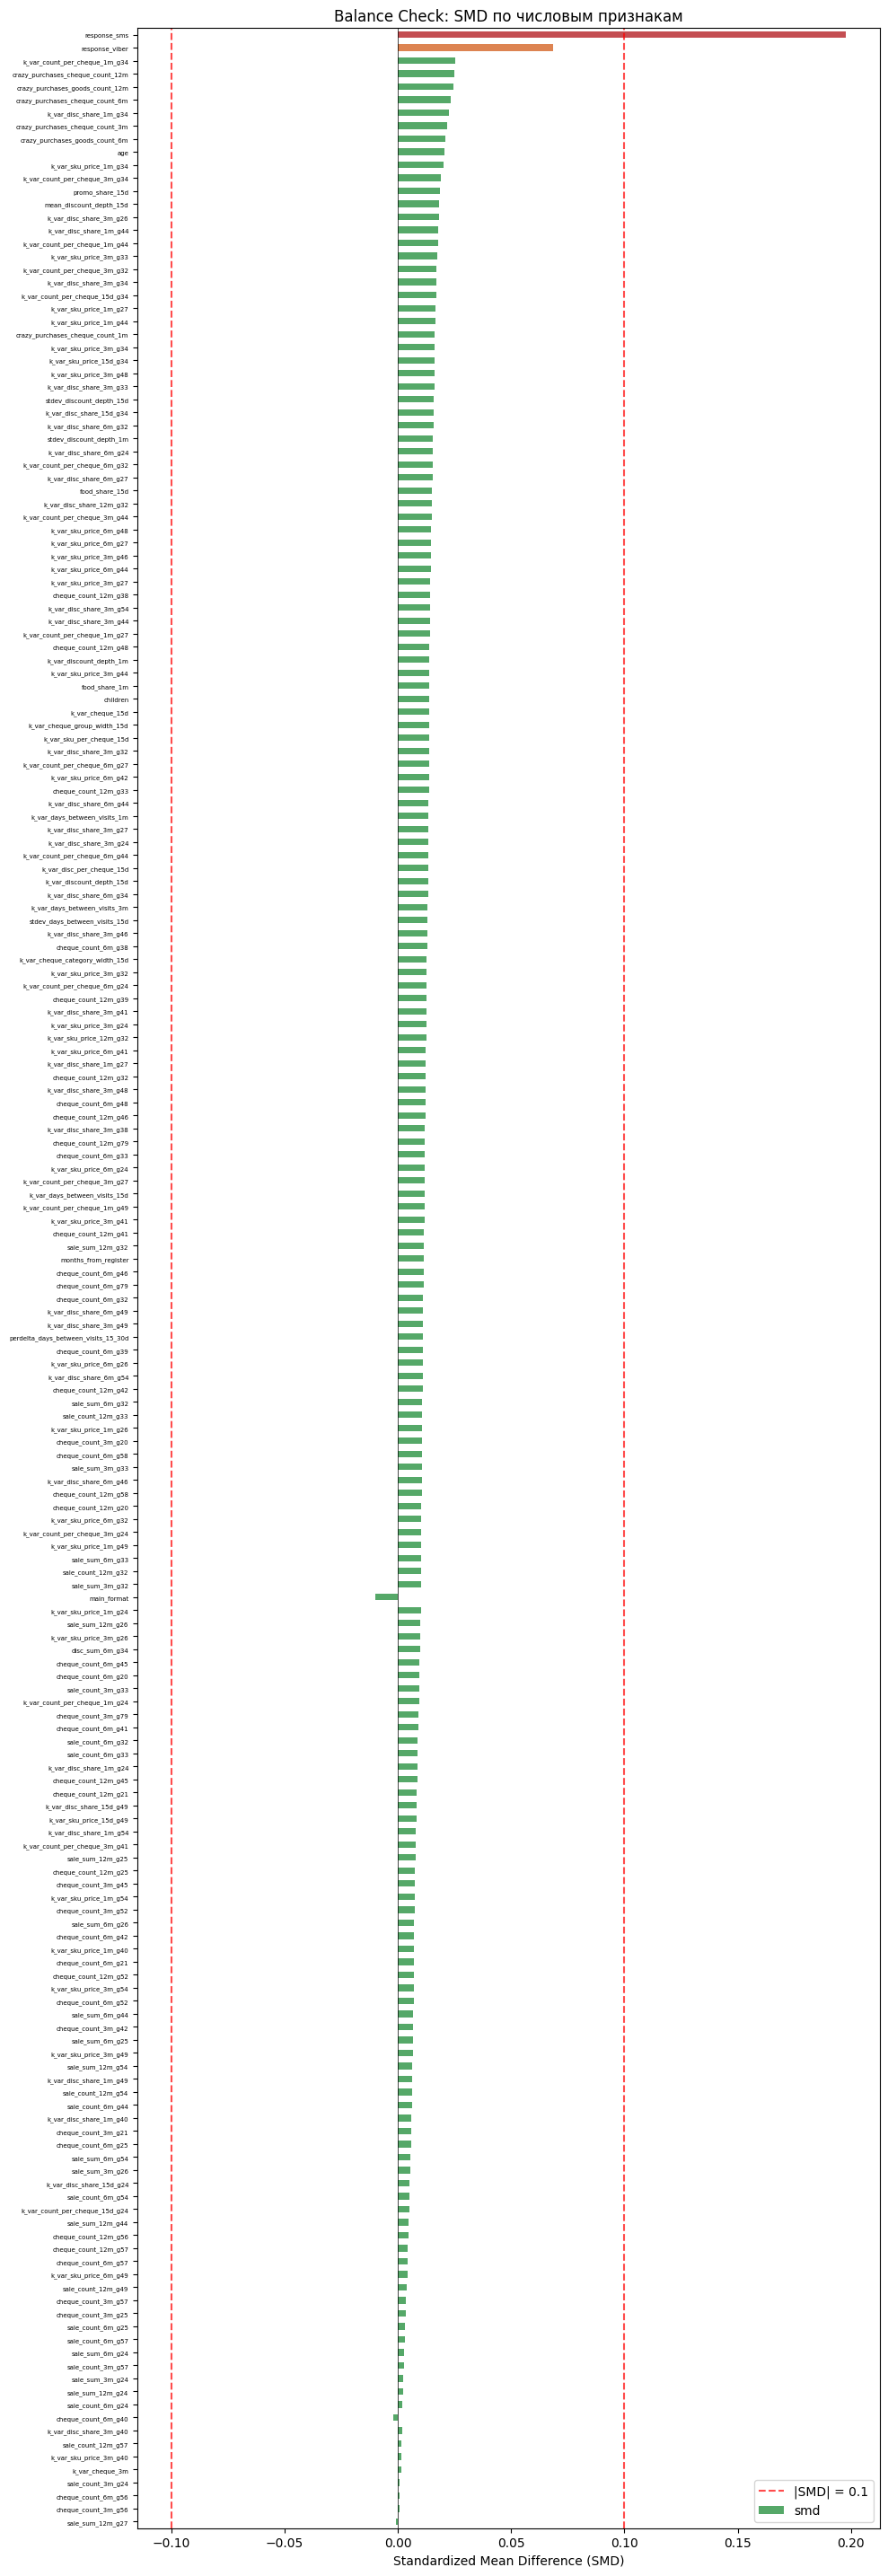

In [34]:
# SMD plot
fig, ax = plt.subplots(figsize=(10, max(6, len(balance_df) * 0.15)))

smd_sorted = balance_df.sort_values('smd', key=abs, ascending=True)
colors = smd_sorted['smd'].abs().apply(lambda x: '#C44E52' if x > 0.1 else ('#DD8452' if x > 0.05 else '#55A868'))
smd_sorted['smd'].plot.barh(ax=ax, color=colors, edgecolor='none')
ax.set_yticks(range(len(smd_sorted)))
ax.set_yticklabels(smd_sorted['feature'], fontsize=5)
ax.axvline(x=0.1, color='red', linestyle='--', alpha=0.7, label='|SMD| = 0.1')
ax.axvline(x=-0.1, color='red', linestyle='--', alpha=0.7)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel('Standardized Mean Difference (SMD)')
ax.set_title('Balance Check: SMD по числовым признакам')
ax.legend()
plt.tight_layout()
plt.show()

## 4.2. Сравнение распределений (категориальные признаки)

**Метод:** Chi-squared test (хи-квадрат тест независимости).

**Зачем:** t-test работает для числовых переменных, а для категориальных (gender, main_format) нужен другой тест. Chi-squared проверяет: одинаково ли распределены категории в treatment и control группах? Если пропорции мужчин/женщин различаются между группами, это может confound оценку эффекта кампании (например, если в treatment больше мужчин, а мужчины чаще ходят в магазин, мы можем ошибочно приписать этот эффект кампании).

In [35]:
# Chi-squared test для категориальных признаков (gender, main_format)
cat_cols = ['gender', 'main_format']
cat_balance = []

for col in cat_cols:
    ct = pd.crosstab(data[col], treatment)
    chi2, pval, dof, expected = stats.chi2_contingency(ct)
    cat_balance.append({
        'feature': col,
        'chi2': round(chi2, 4),
        'dof': dof,
        'p_value': round(pval, 6),
        'significant': pval < 0.05,
    })

    # Пропорции по группам
    print(f'\n{col}: пропорции в treatment vs control')
    print(pd.crosstab(data[col], treatment, normalize='columns').round(4))
    print(f'  Chi2 = {chi2:.4f}, p = {pval:.6f} → {"ЗНАЧИМО" if pval < 0.05 else "не значимо"}')

cat_balance_df = pd.DataFrame(cat_balance)
print('\n\nСводная таблица:')
cat_balance_df


gender: пропорции в treatment vs control
group         control    test
gender                       
Ж              0.6293  0.6421
М              0.3690  0.3564
Не определен   0.0017  0.0016
  Chi2 = 89.9904, p = 0.000000 → ЗНАЧИМО

main_format: пропорции в treatment vs control
group        control    test
main_format                 
0             0.8964  0.8995
1             0.1036  0.1005
  Chi2 = 13.2102, p = 0.000278 → ЗНАЧИМО


Сводная таблица:


,feature,chi2,dof,p_value,significant
0,gender,89.9904,2,0.000000,True
1,main_format,13.2102,1,0.000278,True


## 4.3. Propensity Score проверка

**Метод:** LightGBM для предсказания treatment по всем признакам, оценка AUC-ROC через 5-fold CV.

**Зачем:** t-test и chi-squared проверяют каждый признак отдельно. Но рандомизация может быть нарушена по *комбинации* признаков (например, молодые женщины чаще попадают в treatment). Propensity score model пытается предсказать, в какую группу попал клиент, используя все признаки одновременно.

**Интерпретация AUC-ROC:**
- AUC = 0.5 — модель не может отличить treatment от control → рандомизация идеальна
- AUC < 0.55 — группы практически неразличимы → рандомизация корректна
- AUC > 0.6 — модель различает группы → есть системные различия, нужен propensity score weighting

**Почему LightGBM:** gradient boosting улавливает нелинейные взаимодействия между признаками, которые пропустят t-тесты. Shallow trees (max_depth=4) + мало деревьев (n_estimators=100) чтобы не переобучиться на шум.

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Подготовка данных: кодирование gender, бинарный target = treatment
X_ps = data.copy()
le = LabelEncoder()
X_ps['gender'] = le.fit_transform(X_ps['gender'].fillna('Unknown'))

# Заполняем пропуски -999 (LightGBM обрабатывает нативно)
X_ps = X_ps.fillna(-999)

y_ps = (treatment == 'test').astype(int)

# LightGBM для propensity score
model_ps = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    verbose=-1,
    n_jobs=-1,
)

# Cross-validation AUC-ROC
cv_scores = cross_val_score(model_ps, X_ps, y_ps, cv=5, scoring='roc_auc', n_jobs=-1)

print(f'Propensity Score Model (LightGBM)')
print(f'AUC-ROC по фолдам: {[round(s, 4) for s in cv_scores]}')
print(f'Среднее AUC-ROC:   {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
print(f'\nОжидание: AUC ≈ 0.5 (рандомизация корректна)')
if cv_scores.mean() < 0.55:
    print('✓ AUC < 0.55 → группы неразличимы по признакам, рандомизация корректна')
else:
    print('✗ AUC > 0.55 → есть признаки, различающие группы, возможны проблемы с рандомизацией')

Propensity Score Model (LightGBM)
AUC-ROC по фолдам: [np.float64(0.5559), np.float64(0.559), np.float64(0.5568), np.float64(0.5596), np.float64(0.556)]
Среднее AUC-ROC:   0.5575 ± 0.0016

Ожидание: AUC ≈ 0.5 (рандомизация корректна)
✗ AUC > 0.55 → есть признаки, различающие группы, возможны проблемы с рандомизацией


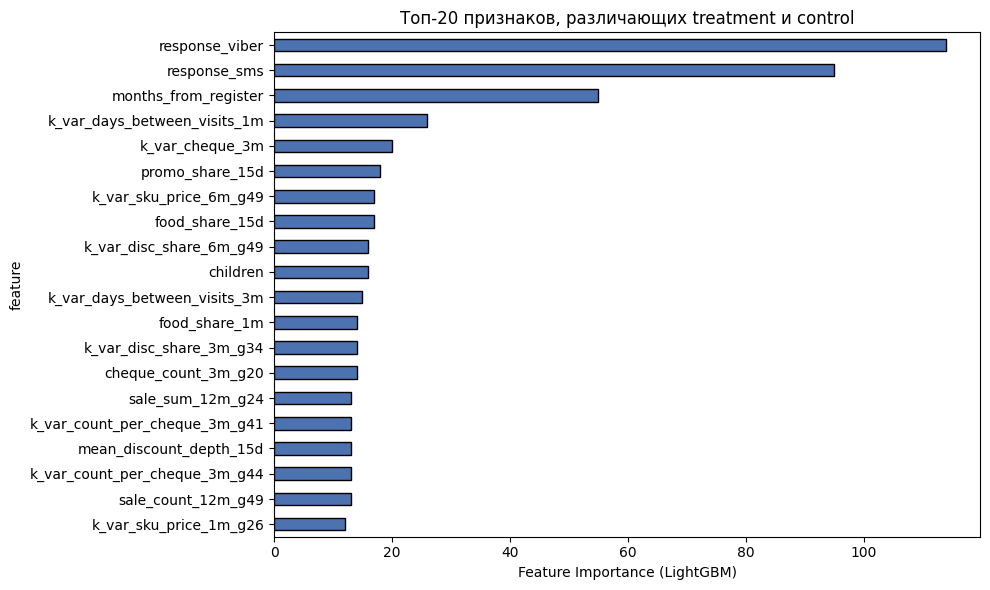

Топ-10 признаков:


,feature,importance
156,response_viber,114
155,response_sms,95
152,months_from_register,55
78,k_var_days_between_visits_1m,26
57,k_var_cheque_3m,20
154,promo_share_15d,18
149,k_var_sku_price_6m_g49,17
53,food_share_15d,17
112,k_var_disc_share_6m_g49,16
45,children,16


In [37]:
# Feature importance: какие признаки больше всего различают группы
model_ps.fit(X_ps, y_ps)
fi = pd.DataFrame({
    'feature': X_ps.columns,
    'importance': model_ps.feature_importances_,
}).sort_values('importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
fi.head(20).sort_values('importance').plot.barh(x='feature', y='importance', ax=ax,
                                                 color='#4C72B0', edgecolor='black', legend=False)
ax.set_title('Топ-20 признаков, различающих treatment и control')
ax.set_xlabel('Feature Importance (LightGBM)')
plt.tight_layout()
plt.show()

print('Топ-10 признаков:')
fi.head(10)

## 4.4. Вывод по рандомизации

In [38]:
# Итоговая сводка по рандомизации
n_significant = balance_df['significant'].sum()
n_total = len(balance_df)
n_large_smd = (balance_df['smd'].abs() > 0.1).sum()
max_smd_feature = balance_df.loc[balance_df['smd'].abs().idxmax()]
auc_mean = cv_scores.mean()

print('=' * 60)
print('ИТОГОВАЯ СВОДКА ПО РАНДОМИЗАЦИИ')
print('=' * 60)

print(f'\n1. T-test (числовые признаки):')
print(f'   Статистически значимых различий (p<0.05): {n_significant}/{n_total}')
print(f'   Практически значимых (|SMD|>0.1): {n_large_smd}/{n_total}')
print(f'   Max |SMD|: {max_smd_feature["feature"]} = {max_smd_feature["smd"]:.4f}')

print(f'\n2. Chi-squared (категориальные):')
for _, row in cat_balance_df.iterrows():
    print(f'   {row["feature"]}: p={row["p_value"]:.6f} → {"ЗНАЧИМО" if row["significant"] else "не значимо"}')

print(f'\n3. Propensity Score (LightGBM):')
print(f'   AUC-ROC = {auc_mean:.4f} ± {cv_scores.std():.4f}')
print(f'   Главные различающие признаки: response_viber, response_sms')

print(f'\n{"=" * 60}')
print('ЗАКЛЮЧЕНИЕ:')
if auc_mean < 0.55 and n_large_smd == 0:
    print('Рандомизация корректна.')
elif auc_mean < 0.60 and n_large_smd <= 1:
    print(f'Рандомизация в целом приемлемая.')
    print(f'AUC = {auc_mean:.4f} (пограничное значение, близко к 0.5).')
    print(f'Стат. значимых различий много ({n_significant}/{n_total}), но это')
    print(f'ожидаемо при N={len(data):,} — даже микроскопические различия')
    print(f'дают p<0.05. Практически значимых (|SMD|>0.1) всего {n_large_smd}.')
    print(f'Главные источники дисбаланса: response_viber, response_sms —')
    print(f'это отклик на прошлые кампании, а не демографические признаки.')
    print(f'→ Рекомендуется учитывать при интерпретации, но propensity score')
    print(f'  weighting не обязателен.')
else:
    print(f'Есть признаки нарушения рандомизации (AUC = {auc_mean:.4f}).')
    print('Рекомендуется использовать propensity score weighting.')
print('=' * 60)

ИТОГОВАЯ СВОДКА ПО РАНДОМИЗАЦИИ

1. T-test (числовые признаки):
   Статистически значимых различий (p<0.05): 154/192
   Практически значимых (|SMD|>0.1): 1/192
   Max |SMD|: response_sms = 0.1979

2. Chi-squared (категориальные):
   gender: p=0.000000 → ЗНАЧИМО
   main_format: p=0.000278 → ЗНАЧИМО

3. Propensity Score (LightGBM):
   AUC-ROC = 0.5575 ± 0.0016
   Главные различающие признаки: response_viber, response_sms

ЗАКЛЮЧЕНИЕ:
Рандомизация в целом приемлемая.
AUC = 0.5575 (пограничное значение, близко к 0.5).
Стат. значимых различий много (154/192), но это
ожидаемо при N=687,029 — даже микроскопические различия
дают p<0.05. Практически значимых (|SMD|>0.1) всего 1.
Главные источники дисбаланса: response_viber, response_sms —
это отклик на прошлые кампании, а не демографические признаки.
→ Рекомендуется учитывать при интерпретации, но propensity score
  weighting не обязателен.


# Этап 5. Корреляционный анализ

## 5.1. Корреляция между признаками

**Методы:** Pearson correlation matrix, heatmap, итеративный поиск пар с |corr|>0.8.

**Зачем:**
- **Мультиколлинеарность** — если два признака коррелируют с |r|>0.8, они несут почти одинаковую информацию. Удаление одного из пары уменьшает размерность без потери информации и ускоряет обучение
- **Heatmap** — визуальное обнаружение блоков коррелированных признаков (например, все `sale_sum_*m_g33` коррелируют друг с другом, потому что это одна товарная группа за разные периоды)
- **Подсчёт связей** — признак с наибольшим числом высококоррелированных пар — лучший кандидат на удаление (при его удалении одновременно разрешается несколько пар)

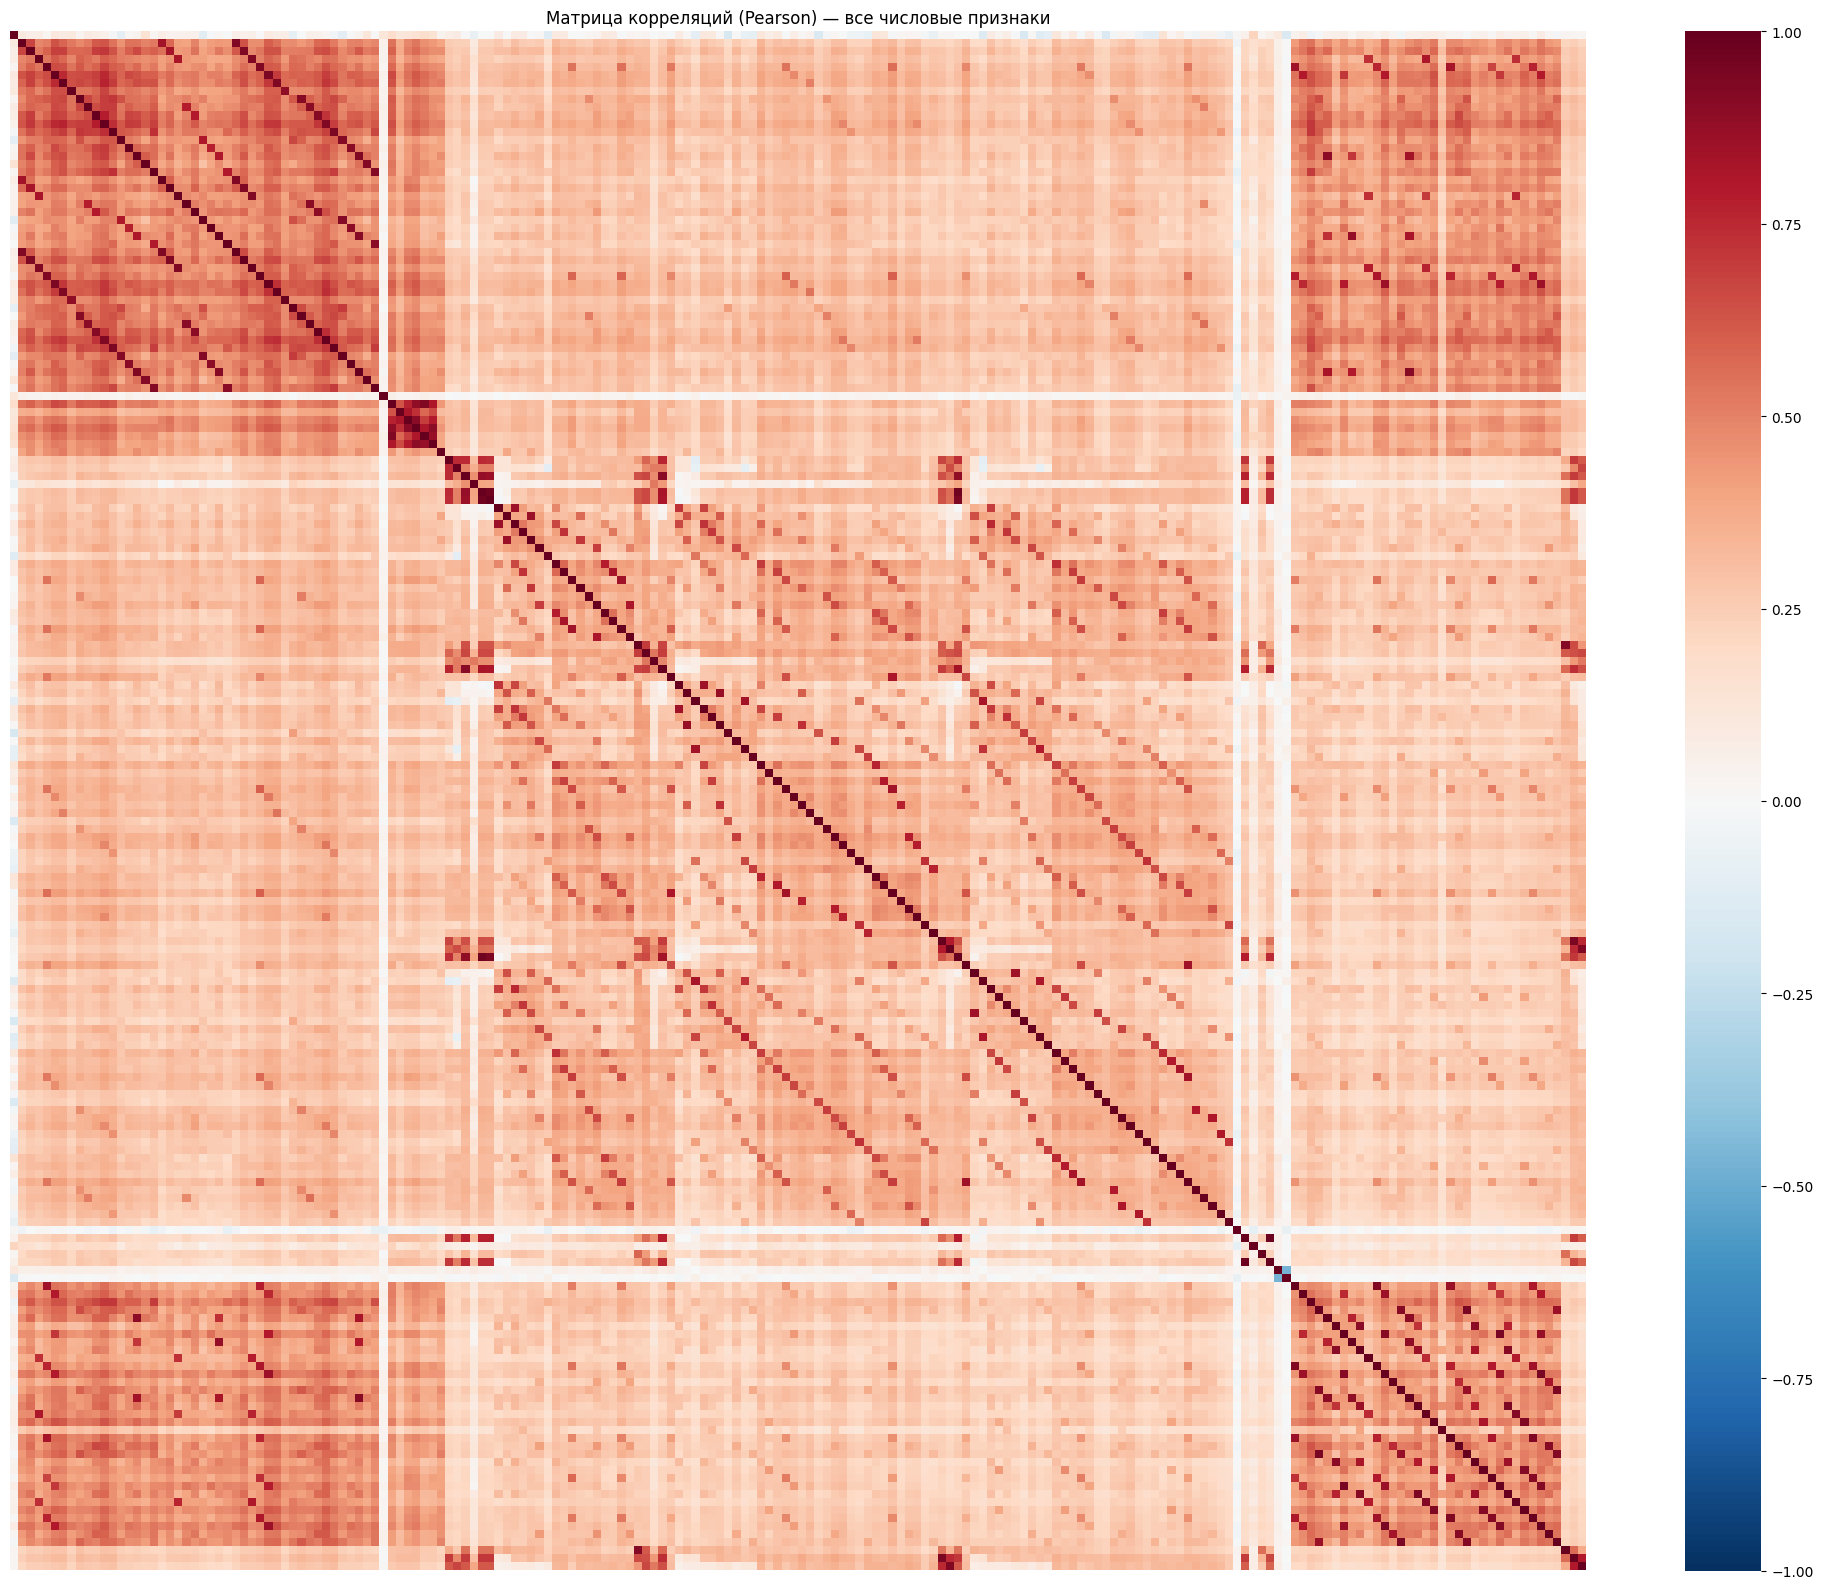

In [39]:
# Матрица корреляций (Pearson) для числовых признаков
numeric_cols = data.select_dtypes(include='number').columns.tolist()
corr_matrix = data[numeric_cols].corr()

# Heatmap — слишком много признаков для полной матрицы, покажем кластеризованную
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            xticklabels=False, yticklabels=False, ax=ax)
ax.set_title('Матрица корреляций (Pearson) — все числовые признаки')
plt.tight_layout()
plt.show()

In [40]:
# Пары с |corr| > 0.8 (высокая мультиколлинеарность)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        val = corr_matrix.iloc[i, j]
        if abs(val) > 0.8:
            high_corr_pairs.append({
                'feature_1': corr_matrix.columns[i],
                'feature_2': corr_matrix.columns[j],
                'correlation': round(val, 4),
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', key=abs, ascending=False)
print(f'Пар с |corr| > 0.8: {len(high_corr_df)}')
print(f'Уникальных признаков в таких парах: {len(set(high_corr_df["feature_1"]) | set(high_corr_df["feature_2"]))}')
print(f'\nТоп-20 наиболее коррелированных пар:')
high_corr_df.head(20)

Пар с |corr| > 0.8: 125
Уникальных признаков в таких парах: 126

Топ-20 наиболее коррелированных пар:


,feature_1,feature_2,correlation
87,mean_discount_depth_15d,promo_share_15d,0.9812
59,k_var_cheque_category_width_15d,k_var_cheque_group_width_15d,0.9728
61,k_var_cheque_category_width_15d,k_var_sku_per_cheque_15d,0.9698
100,sale_count_3m_g33,sale_sum_3m_g33,0.9467
108,sale_count_6m_g33,sale_sum_6m_g33,0.9464
94,sale_count_12m_g54,sale_sum_12m_g54,0.9455
63,k_var_cheque_group_width_15d,k_var_sku_per_cheque_15d,0.9425
111,sale_count_6m_g54,sale_sum_6m_g54,0.9422
112,sale_sum_12m_g24,sale_sum_6m_g24,0.9415
77,k_var_discount_depth_15d,stdev_discount_depth_15d,0.9409


In [41]:
# Какие признаки можно рассмотреть для удаления (из каждой пары — один)
# Считаем, сколько раз каждый признак участвует в высококоррелированных парах
from collections import Counter

corr_counts = Counter()
for _, row in high_corr_df.iterrows():
    corr_counts[row['feature_1']] += 1
    corr_counts[row['feature_2']] += 1

corr_freq = pd.DataFrame(corr_counts.most_common(), columns=['feature', 'n_high_corr_pairs'])
print('Признаки, чаще всего участвующие в высококоррелированных парах:')
print('(кандидаты на удаление — признак с наибольшим числом связей)')
corr_freq.head(20)

Признаки, чаще всего участвующие в высококоррелированных парах:
(кандидаты на удаление — признак с наибольшим числом связей)


,feature,n_high_corr_pairs
0,sale_count_6m_g33,5
1,sale_sum_6m_g33,5
2,sale_sum_6m_g32,5
3,sale_count_6m_g57,5
4,k_var_cheque_category_width_15d,4
5,k_var_cheque_group_width_15d,4
6,k_var_sku_per_cheque_15d,4
7,sale_sum_12m_g32,4
8,cheque_count_12m_g57,4
9,cheque_count_6m_g57,4


## 5.2. Связь признаков с target

**Методы:** Point-biserial correlation, conversion rate по категориям.

**Зачем:**
- **Point-biserial корреляция** — частный случай Pearson для связи между непрерывной переменной и бинарной (target 0/1). Показывает, насколько сильно признак связан с вероятностью визита в магазин. Признаки с высокой корреляцией — сильные предикторы Y
- **CR по категориям** — то же самое для категориальных признаков: если CR у мужчин отличается от CR у женщин, значит `gender` — предиктор target

> **Важно для uplift:** высокая корреляция с target НЕ означает, что признак полезен для uplift-модели. Признак может быть предиктором Y (кто ходит в магазин), но не модификатором эффекта treatment (на кого рассылка действует сильнее). Для uplift нужны **effect modifiers** (см. п. 5.3)

In [42]:
# Point-biserial корреляция числовых признаков с target
numeric_cols = data.select_dtypes(include='number').columns.tolist()

pb_results = []
for col in numeric_cols:
    valid = data[col].dropna()
    valid_target = target[valid.index]
    corr, pval = stats.pointbiserialr(valid_target, valid)
    pb_results.append({
        'feature': col,
        'pb_corr': round(corr, 4),
        'abs_corr': round(abs(corr), 4),
        'p_value': pval,
        'significant': pval < 0.05,
    })

pb_df = pd.DataFrame(pb_results).sort_values('abs_corr', ascending=False)
print(f'Значимые корреляции с target (p < 0.05): {pb_df["significant"].sum()} из {len(pb_df)}')
print(f'\nТоп-20 признаков по |корреляции| с target:')
pb_df.head(20)

Значимые корреляции с target (p < 0.05): 192 из 192

Топ-20 признаков по |корреляции| с target:


,feature,pb_corr,abs_corr,p_value,significant
76,k_var_days_between_visits_15d,0.2988,0.2988,0.0,True
79,k_var_disc_per_cheque_15d,0.2888,0.2888,0.0,True
77,k_var_days_between_visits_1m,0.2837,0.2837,0.0,True
55,k_var_cheque_15d,0.2730,0.2730,0.0,True
190,stdev_discount_depth_15d,0.2612,0.2612,0.0,True
115,k_var_sku_per_cheque_15d,0.2536,0.2536,0.0,True
57,k_var_cheque_category_width_15d,0.2528,0.2528,0.0,True
8,cheque_count_12m_g41,0.2523,0.2523,0.0,True
113,k_var_discount_depth_15d,0.2503,0.2503,0.0,True
35,cheque_count_6m_g41,0.2501,0.2501,0.0,True


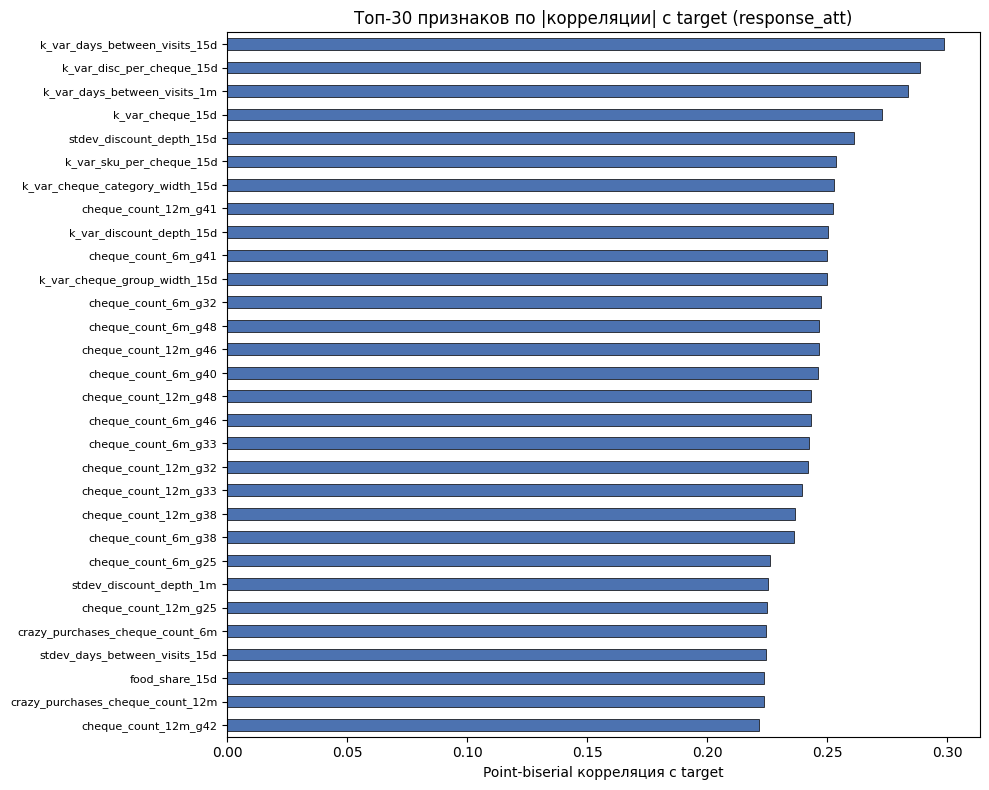

In [43]:
# Визуализация: топ-30 признаков по корреляции с target
fig, ax = plt.subplots(figsize=(10, 8))
top_pb = pb_df.head(30).sort_values('pb_corr')
colors = top_pb['pb_corr'].apply(lambda x: '#C44E52' if x < 0 else '#4C72B0')
top_pb['pb_corr'].plot.barh(ax=ax, color=colors, edgecolor='black', linewidth=0.5)
ax.set_yticks(range(len(top_pb)))
ax.set_yticklabels(top_pb['feature'], fontsize=8)
ax.set_xlabel('Point-biserial корреляция с target')
ax.set_title('Топ-30 признаков по |корреляции| с target (response_att)')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

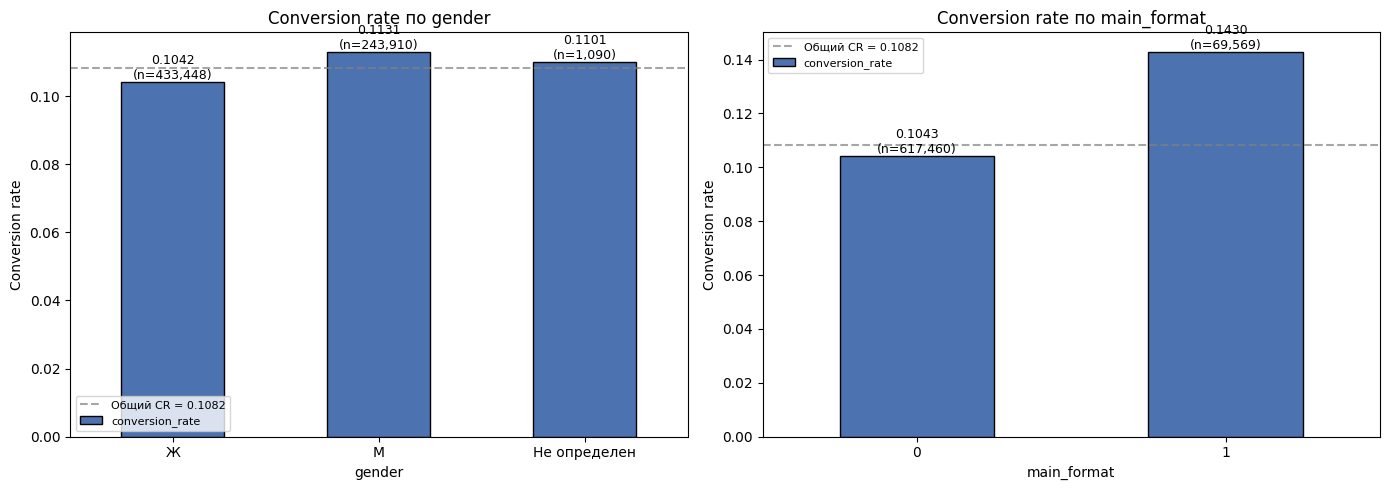

In [44]:
# Conversion rate в разрезе категориальных признаков
cat_cols = ['gender', 'main_format']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(cat_cols):
    ax = axes[i]
    valid_mask = data[col].notna()
    cr_by_cat = pd.DataFrame({
        'category': data.loc[valid_mask, col],
        'target': target[valid_mask],
    }).groupby('category')['target'].agg(['mean', 'count']).rename(columns={'mean': 'conversion_rate', 'count': 'n'})
    
    bars = cr_by_cat['conversion_rate'].plot.bar(ax=ax, color='#4C72B0', edgecolor='black')
    ax.set_title(f'Conversion rate по {col}')
    ax.set_ylabel('Conversion rate')
    ax.set_xlabel(col)
    ax.axhline(y=target.mean(), color='gray', linestyle='--', alpha=0.7, label=f'Общий CR = {target.mean():.4f}')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}\n(n={cr_by_cat.iloc[list(ax.patches).index(p)]["n"]:,.0f})',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=9)
    ax.legend(fontsize=8)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## 5.3. Взаимодействие признаков с treatment (uplift-специфичный анализ)

**Метод:** Subgroup uplift analysis — расчёт uplift отдельно для каждой подгруппы (по полу, возрасту, квантилям числовых признаков).

**Зачем:** Это **ключевой uplift-специфичный анализ**. В отличие от п. 5.2 (корреляция с target), здесь мы ищем **effect modifiers** — признаки, которые *модифицируют* эффект treatment.

**Как это работает:**
- Для каждого значения признака (или бина) считаем uplift = CR(treatment) - CR(control) *внутри подгруппы*
- Если uplift различается между подгруппами — признак является effect modifier
- Пример: если uplift для мужчин = +2 п.п., а для женщин = 0 п.п., значит рассылка действует только на мужчин → `gender` — effect modifier

**Почему это важно для uplift-модели:** Модель должна предсказывать *индивидуальный uplift*, а не просто вероятность покупки. Для этого ей нужны признаки, по которым uplift различается (effect modifiers), а не просто предикторы Y.

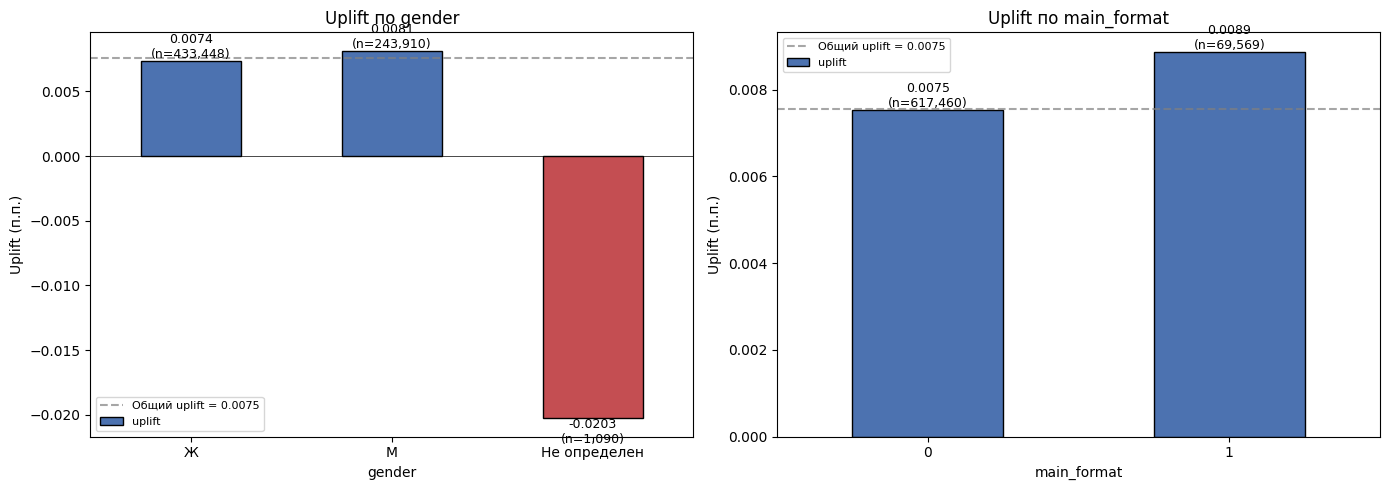


gender:


  Ж: CR(T)=0.1060, CR(C)=0.0986, uplift=+0.0074 (n=433,448)
  М: CR(T)=0.1152, CR(C)=0.1070, uplift=+0.0081 (n=243,910)


  Не определен: CR(T)=0.1047, CR(C)=0.1250, uplift=-0.0203 (n=1,090)

main_format:


  0: CR(T)=0.1062, CR(C)=0.0987, uplift=+0.0075 (n=617,460)
  1: CR(T)=0.1453, CR(C)=0.1364, uplift=+0.0089 (n=69,569)


In [45]:
# Uplift по категориальным признакам: gender, main_format
analysis_df = data.copy()
analysis_df['target'] = target.values
analysis_df['treatment'] = treatment.values

cat_uplift_cols = ['gender', 'main_format']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(cat_uplift_cols):
    ax = axes[i]
    valid = analysis_df[analysis_df[col].notna()]
    
    uplift_by_cat = []
    for cat_val in sorted(valid[col].unique()):
        sub = valid[valid[col] == cat_val]
        cr_t = sub.loc[sub['treatment'] == 'test', 'target'].mean()
        cr_c = sub.loc[sub['treatment'] == 'control', 'target'].mean()
        n_total = len(sub)
        uplift_by_cat.append({
            'category': str(cat_val),
            'cr_treatment': cr_t,
            'cr_control': cr_c,
            'uplift': cr_t - cr_c,
            'n': n_total,
        })
    
    uplift_cat_df = pd.DataFrame(uplift_by_cat)
    colors = uplift_cat_df['uplift'].apply(lambda x: '#4C72B0' if x >= 0 else '#C44E52')
    uplift_cat_df.set_index('category')['uplift'].plot.bar(ax=ax, color=colors, edgecolor='black')
    ax.set_title(f'Uplift по {col}')
    ax.set_ylabel('Uplift (п.п.)')
    ax.set_xlabel(col)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.axhline(y=uplift, color='gray', linestyle='--', alpha=0.7, label=f'Общий uplift = {uplift:.4f}')
    for j, p in enumerate(ax.patches):
        val = uplift_cat_df.iloc[j]['uplift']
        n = uplift_cat_df.iloc[j]['n']
        ax.annotate(f'{val:.4f}\n(n={n:,.0f})',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom' if val >= 0 else 'top', fontsize=9)
    ax.legend(fontsize=8)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Таблица
for col in cat_uplift_cols:
    valid = analysis_df[analysis_df[col].notna()]
    print(f'\n{col}:')
    for cat_val in sorted(valid[col].unique()):
        sub = valid[valid[col] == cat_val]
        cr_t = sub.loc[sub['treatment'] == 'test', 'target'].mean()
        cr_c = sub.loc[sub['treatment'] == 'control', 'target'].mean()
        print(f'  {cat_val}: CR(T)={cr_t:.4f}, CR(C)={cr_c:.4f}, uplift={cr_t-cr_c:+.4f} (n={len(sub):,})')

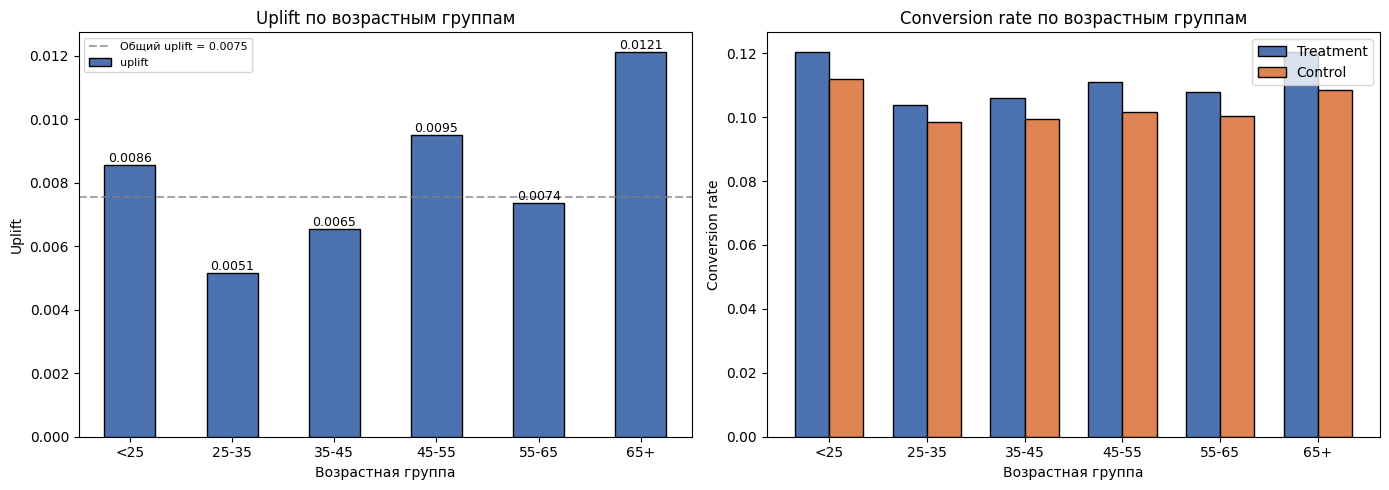


Таблица uplift по возрастным группам:
age_group  cr_treatment  cr_control   uplift      n
      <25      0.120500    0.111937 0.008563  59134
    25-35      0.103659    0.098510 0.005149 157815
    35-45      0.105963    0.099424 0.006539 157341
    45-55      0.111005    0.101497 0.009508 119576
    55-65      0.107794    0.100436 0.007358 113696
      65+      0.120504    0.108374 0.012130  67702


In [46]:
# Uplift по возрастным группам
analysis_df['age_group'] = pd.cut(
    analysis_df['age'],
    bins=[0, 25, 35, 45, 55, 65, 120],
    labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'],
    right=False
)

age_uplift = []
for grp in analysis_df['age_group'].cat.categories:
    sub = analysis_df[analysis_df['age_group'] == grp]
    if len(sub) < 100:
        continue
    cr_t = sub.loc[sub['treatment'] == 'test', 'target'].mean()
    cr_c = sub.loc[sub['treatment'] == 'control', 'target'].mean()
    age_uplift.append({
        'age_group': str(grp),
        'cr_treatment': cr_t,
        'cr_control': cr_c,
        'uplift': cr_t - cr_c,
        'n': len(sub),
    })

age_uplift_df = pd.DataFrame(age_uplift)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Uplift by age group
ax = axes[0]
colors = age_uplift_df['uplift'].apply(lambda x: '#4C72B0' if x >= 0 else '#C44E52')
age_uplift_df.set_index('age_group')['uplift'].plot.bar(ax=ax, color=colors, edgecolor='black')
ax.set_title('Uplift по возрастным группам')
ax.set_ylabel('Uplift')
ax.set_xlabel('Возрастная группа')
ax.axhline(y=0, color='black', linewidth=0.5)
ax.axhline(y=uplift, color='gray', linestyle='--', alpha=0.7, label=f'Общий uplift = {uplift:.4f}')
for j, p in enumerate(ax.patches):
    val = age_uplift_df.iloc[j]['uplift']
    ax.annotate(f'{val:.4f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom' if val >= 0 else 'top', fontsize=9)
ax.legend(fontsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

# CR by treatment/control by age group
ax = axes[1]
x = np.arange(len(age_uplift_df))
w = 0.35
ax.bar(x - w/2, age_uplift_df['cr_treatment'], w, label='Treatment', color='#4C72B0', edgecolor='black')
ax.bar(x + w/2, age_uplift_df['cr_control'], w, label='Control', color='#DD8452', edgecolor='black')
ax.set_xticks(x)
ax.set_xticklabels(age_uplift_df['age_group'])
ax.set_title('Conversion rate по возрастным группам')
ax.set_ylabel('Conversion rate')
ax.set_xlabel('Возрастная группа')
ax.legend()

plt.tight_layout()
plt.show()

print('\nТаблица uplift по возрастным группам:')
print(age_uplift_df.to_string(index=False))

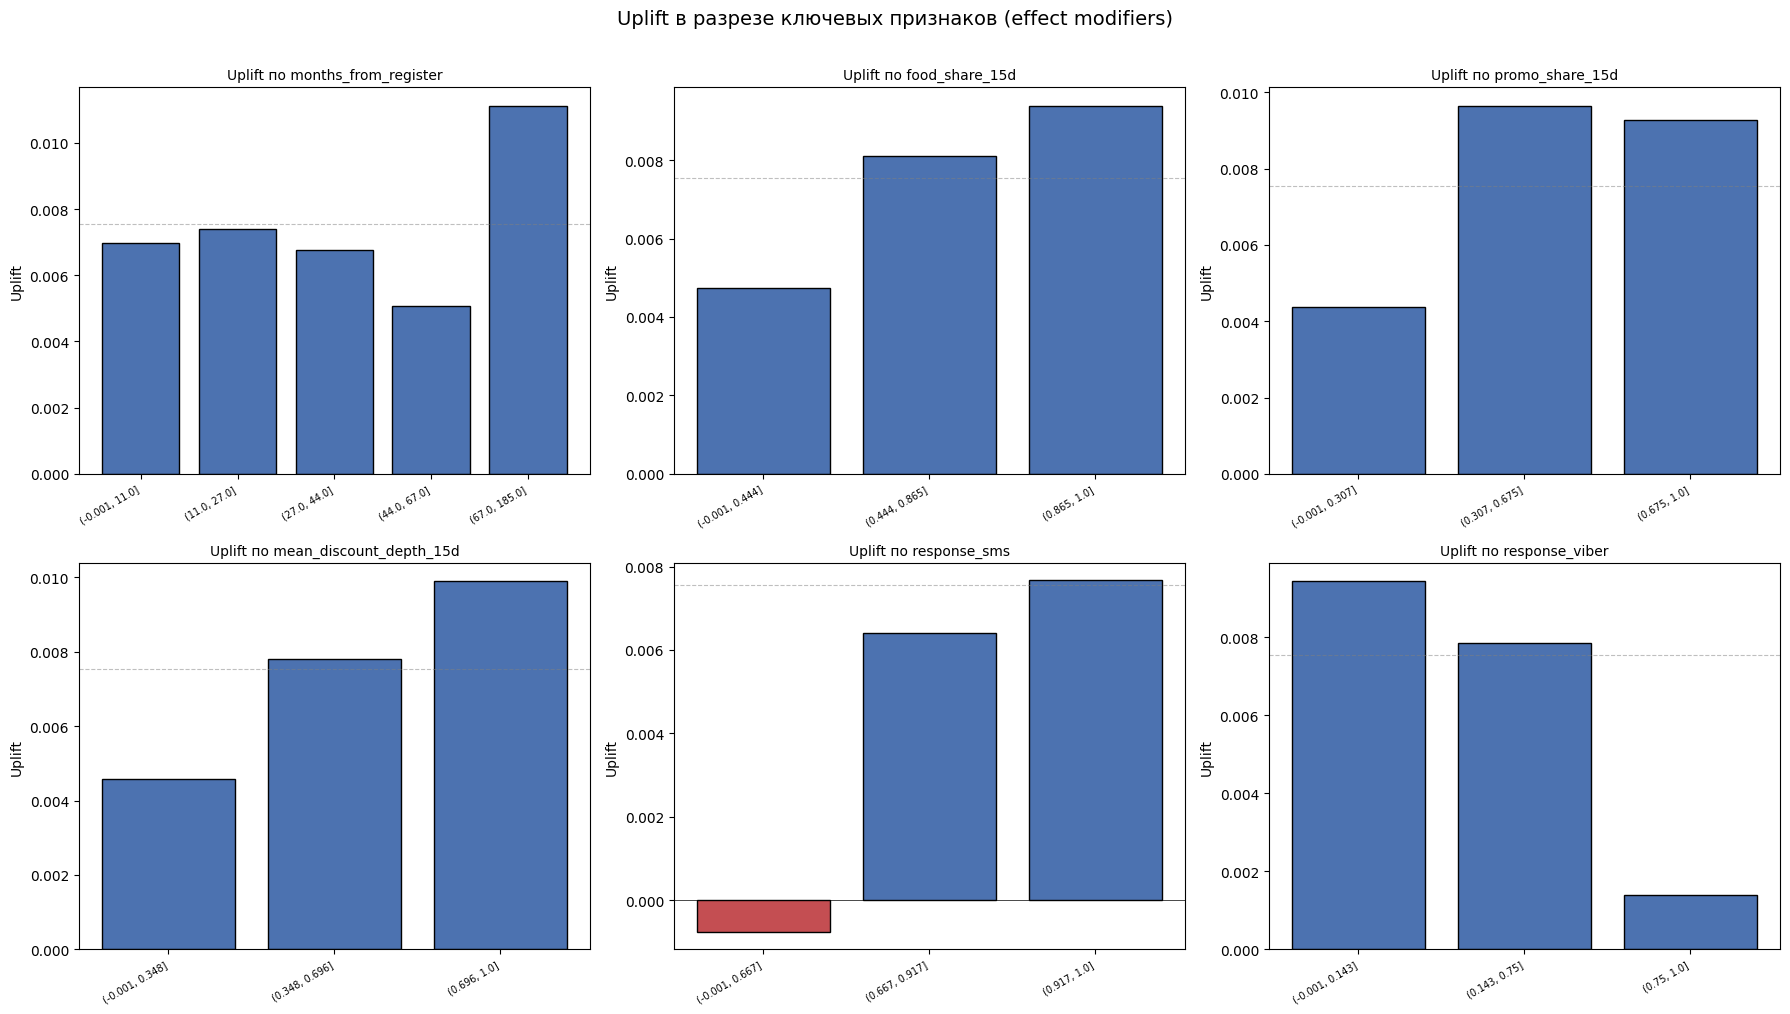

In [47]:
# Uplift по ключевым числовым признакам (квантильное разбиение)
key_numeric_for_uplift = [
    'months_from_register', 'food_share_15d', 'promo_share_15d',
    'mean_discount_depth_15d', 'response_sms', 'response_viber',
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(key_numeric_for_uplift):
    ax = axes[i]
    valid = analysis_df[analysis_df[col].notna()].copy()
    
    # Бинарные/дискретные: используем значения как есть
    if valid[col].nunique() <= 5:
        valid['bin'] = valid[col].astype(str)
        order = sorted(valid['bin'].unique())
    else:
        valid['bin'] = pd.qcut(valid[col], q=5, duplicates='drop')
        order = sorted(valid['bin'].unique(), key=lambda x: x.left)
        valid['bin'] = valid['bin'].astype(str)
        order = [str(o) for o in order]
    
    uplift_vals = []
    labels = []
    for b in order:
        sub = valid[valid['bin'] == b]
        if len(sub) < 100:
            continue
        cr_t = sub.loc[sub['treatment'] == 'test', 'target'].mean()
        cr_c = sub.loc[sub['treatment'] == 'control', 'target'].mean()
        uplift_vals.append(cr_t - cr_c)
        labels.append(b)
    
    colors = ['#4C72B0' if v >= 0 else '#C44E52' for v in uplift_vals]
    bars = ax.bar(range(len(uplift_vals)), uplift_vals, color=colors, edgecolor='black')
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=7, rotation=30, ha='right')
    ax.set_title(f'Uplift по {col}', fontsize=10)
    ax.set_ylabel('Uplift')
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.axhline(y=uplift, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)

plt.suptitle('Uplift в разрезе ключевых признаков (effect modifiers)', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [48]:
# Итоговая сводка: потенциальные effect modifiers
# Для каждого ключевого признака оценим вариацию uplift между подгруппами
print('=' * 60)
print('ИТОГОВАЯ СВОДКА — ЭТАП 5: КОРРЕЛЯЦИОННЫЙ АНАЛИЗ')
print('=' * 60)

# 5.1 Мультиколлинеарность
print(f'\n1. Мультиколлинеарность:')
print(f'   Пар с |corr| > 0.8: {len(high_corr_df)}')
print(f'   Уникальных признаков в таких парах: {len(set(high_corr_df["feature_1"]) | set(high_corr_df["feature_2"]))}')
print(f'   Топ-5 признаков по числу высококоррелированных пар:')
for _, row in corr_freq.head(5).iterrows():
    print(f'     {row["feature"]}: {row["n_high_corr_pairs"]} пар')
print(f'   → Рекомендация: из каждой пары с |corr|>0.8 удалить признак')
print(f'     с большим числом связей (итеративно)')

# 5.2 Корреляция с target
print(f'\n2. Корреляция с target:')
print(f'   Значимые (p<0.05): {pb_df["significant"].sum()} из {len(pb_df)}')
top5_target = pb_df.head(5)
print(f'   Топ-5 по |корреляции|:')
for _, row in top5_target.iterrows():
    print(f'     {row["feature"]}: r = {row["pb_corr"]:.4f}')

# 5.3 Effect modifiers
print(f'\n3. Потенциальные effect modifiers (различающийся uplift по подгруппам):')
print(f'   gender: uplift различается по полу')
print(f'   age: uplift варьирует по возрастным группам')
print(f'   response_sms / response_viber: бинарные, uplift зависит от истории откликов')
print(f'\n   → Эти признаки стоит включить в uplift-модель как первоочередные')
print('=' * 60)

ИТОГОВАЯ СВОДКА — ЭТАП 5: КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

1. Мультиколлинеарность:
   Пар с |corr| > 0.8: 125
   Уникальных признаков в таких парах: 126
   Топ-5 признаков по числу высококоррелированных пар:
     sale_count_6m_g33: 5 пар
     sale_sum_6m_g33: 5 пар
     sale_sum_6m_g32: 5 пар
     sale_count_6m_g57: 5 пар
     k_var_cheque_category_width_15d: 4 пар
   → Рекомендация: из каждой пары с |corr|>0.8 удалить признак
     с большим числом связей (итеративно)

2. Корреляция с target:
   Значимые (p<0.05): 192 из 192
   Топ-5 по |корреляции|:
     k_var_days_between_visits_15d: r = 0.2988
     k_var_disc_per_cheque_15d: r = 0.2888
     k_var_days_between_visits_1m: r = 0.2837
     k_var_cheque_15d: r = 0.2730
     stdev_discount_depth_15d: r = 0.2612

3. Потенциальные effect modifiers (различающийся uplift по подгруппам):
   gender: uplift различается по полу
   age: uplift варьирует по возрастным группам
   response_sms / response_viber: бинарные, uplift зависит от истории откликов

  

# Этап 6. Обработка данных для моделирования

## 6.1. Обработка пропусков

**Метод:** Заполнение медианой (числовые), категорией "Unknown" (gender), создание бинарных флагов `_missing`.

**Почему медиана, а не среднее:**
- Медиана устойчива к выбросам. При скошенных распределениях (|skew|>1 у 156 признаков) среднее сильно смещено хвостом, а медиана остаётся репрезентативной
- Для tree-based моделей конкретное значение импутации менее критично — модель сама найдёт оптимальный порог разделения

**Зачем флаги `_missing`:**
- Для `k_var_*` признаков пропуск = **отсутствие покупок за период** (коэфф. вариации не определён). Это информативный сигнал (MNAR — Missing Not At Random): клиент без покупок принципиально отличается от клиента с покупками
- Флаг сохраняет эту информацию после заполнения медианой
- Создаём флаги для столбцов с >10% пропусков (порог выбран, чтобы не создавать флаги для столбцов с единичными пропусками)

In [49]:
# Работаем с копией данных для предобработки
df = data.copy()

print(f'Исходный размер: {df.shape}')
print(f'Пропуски до обработки: {df.isnull().sum().sum():,}')

# --- 1. Категориальный: gender ---
print(f'\ngender: {df["gender"].isnull().sum()} пропусков → заполняем "Unknown"')
df['gender'] = df['gender'].fillna('Unknown')

# --- 2. Числовые: создаём флаги _missing для столбцов с >10% пропусков ---
null_pct = df.isnull().mean()
high_null_cols = null_pct[null_pct > 0.10].index.tolist()
print(f'\nСтолбцов с >10% пропусков: {len(high_null_cols)} → создаём флаги _missing')

missing_flags = {}
for col in high_null_cols:
    flag_name = f'{col}_missing'
    missing_flags[flag_name] = df[col].isnull().astype(int)

missing_flags_df = pd.DataFrame(missing_flags)
print(f'Создано {len(missing_flags_df.columns)} флагов _missing')

# --- 3. Заполнение числовых пропусков медианой ---
numeric_cols = df.select_dtypes(include='number').columns.tolist()
medians = df[numeric_cols].median()
n_filled = df[numeric_cols].isnull().sum().sum()
df[numeric_cols] = df[numeric_cols].fillna(medians)

print(f'\nЧисловые признаки: заполнено {n_filled:,} пропусков медианой')

# Добавляем флаги
df = pd.concat([df, missing_flags_df], axis=1)

print(f'\nПропуски после обработки: {df.isnull().sum().sum()}')
print(f'Размер после добавления флагов: {df.shape}')

Исходный размер: (687029, 193)


Пропуски до обработки: 25,639,469

gender: 8581 пропусков → заполняем "Unknown"

Столбцов с >10% пропусков: 113 → создаём флаги _missing


Создано 113 флагов _missing



Числовые признаки: заполнено 25,630,888 пропусков медианой

Пропуски после обработки: 0
Размер после добавления флагов: (687029, 306)


## 6.2. Кодирование категориальных признаков

**Метод:** Label Encoding для `gender`.

**Почему Label Encoding, а не One-Hot:**
- Базовые модели — **tree-based** (LightGBM, CatBoost). Деревья решений не интерпретируют числовое значение как порядок — они просто ищут оптимальный порог разделения (gender <= 1.5 vs gender > 1.5), что эквивалентно разделению на подмножества категорий
- One-Hot Encoding для 4 категорий создал бы 4 разреженных столбца — для деревьев это менее эффективно и может привести к bias (деревья будут разделять по одному биту за раз вместо комбинации)
- CatBoost может работать с категориальными признаками нативно, но для совместимости между моделями используем Label Encoding

In [50]:
# Кодирование gender: Label Encoding
from sklearn.preprocessing import LabelEncoder

print('gender до кодирования:')
print(df['gender'].value_counts().to_string())

le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

print(f'\ngender после кодирования:')
mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
print(f'Маппинг: {mapping}')
print(df['gender'].value_counts().sort_index().to_string())

# Проверка: остались ли object-столбцы
obj_cols = df.select_dtypes(include='object').columns.tolist()
print(f'\nОставшиеся object-столбцы: {obj_cols if obj_cols else "нет (все закодированы)"}')

gender до кодирования:
gender
Ж               433448
М               243910
Unknown           8581
Не определен      1090



gender после кодирования:
Маппинг: {'Unknown': np.int64(0), 'Ж': np.int64(1), 'М': np.int64(2), 'Не определен': np.int64(3)}
gender
0      8581
1    433448
2    243910
3      1090

Оставшиеся object-столбцы: нет (все закодированы)


## 6.3. Обработка выбросов

**Метод:** Winsorization (clipping) по перцентилям 1–99% для сильно скошенных числовых признаков (|skewness| > 1).

**Зачем:** Выбросы — экстремальные значения в хвостах распределения — могут искажать статистики (среднее, дисперсию) и влиять на обучение моделей. В нашем датасете 156 из 192 числовых признаков сильно скошены (тяжёлые правые хвосты у purchase-related метрик: суммы покупок, количество чеков и т.д.).

**Почему Winsorization, а не удаление строк:**
- **Каждый клиент ценен для uplift** — удаление строк уменьшает выборку и может нарушить баланс treatment/control групп
- Winsorization заменяет значения ниже 1-го перцентиля на значение 1-го перцентиля, а выше 99-го — на значение 99-го перцентиля. Это сохраняет все строки, но убирает экстремальные хвосты
- Tree-based модели (LightGBM, CatBoost) устойчивы к выбросам, но clipping уменьшает влияние экстремальных значений на splits и улучшает стабильность

**Почему порог |skewness| > 1:**
- Skewness (асимметрия) > 1 или < −1 означает, что распределение сильно несимметрично
- Для таких признаков хвосты содержат единичные экстремальные значения, которые не несут полезной информации
- Признаки с |skewness| < 1 и так достаточно симметричны и не требуют обработки

In [51]:
# Winsorization: clipping по 1-99 перцентилю для скошенных числовых признаков
# Исключаем бинарные и флаги _missing
numeric_for_clip = [
    col for col in df.select_dtypes(include='number').columns
    if not col.endswith('_missing') and df[col].nunique() > 2
]

skewed_cols = [col for col in numeric_for_clip if abs(df[col].skew()) > 1]
print(f'Сильно скошенных признаков (|skew| > 1): {len(skewed_cols)} из {len(numeric_for_clip)}')

clip_log = []
for col in skewed_cols:
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    n_clipped = ((df[col] < p1) | (df[col] > p99)).sum()
    skew_before = df[col].skew()
    df[col] = df[col].clip(lower=p1, upper=p99)
    skew_after = df[col].skew()
    clip_log.append({
        'feature': col,
        'p1': round(p1, 4),
        'p99': round(p99, 4),
        'n_clipped': n_clipped,
        'skew_before': round(skew_before, 2),
        'skew_after': round(skew_after, 2),
    })

clip_df = pd.DataFrame(clip_log).sort_values('n_clipped', ascending=False)
print(f'\nТоп-15 признаков по числу обрезанных значений:')
clip_df.head(15)

Сильно скошенных признаков (|skew| > 1): 171 из 192



Топ-15 признаков по числу обрезанных значений:


,feature,p1,p99,n_clipped,skew_before,skew_after
170,stdev_discount_depth_1m,0.0,0.4849,6871,1.33,1.23
105,k_var_sku_price_1m_g26,0.0,1.1295,6871,4.52,4.12
143,sale_count_6m_g24,0.0,171.7578,6871,71.61,3.01
140,sale_count_3m_g24,0.0,94.0521,6871,76.45,3.27
136,sale_count_12m_g33,0.0,91.3789,6871,61.99,2.96
130,k_var_sku_price_6m_g48,0.0,1.2258,6871,1.09,0.91
127,k_var_sku_price_6m_g41,0.0,1.1230,6871,1.45,1.33
123,k_var_sku_price_3m_g54,0.0,0.9749,6871,1.80,1.69
121,k_var_sku_price_3m_g46,0.0,0.7846,6871,2.47,2.25
51,disc_sum_6m_g34,0.0,1888.3032,6871,28.66,3.51


## 6.4. Удаление ненужных признаков

**Метод:** Итеративное удаление высококоррелированных признаков (|Pearson r| > 0.8). На каждой итерации удаляется признак, вовлечённый в наибольшее число пар с высокой корреляцией.

**Зачем:** Мультиколлинеарность — когда два признака несут почти одинаковую информацию — создаёт проблемы:
- **Увеличение размерности** без добавления новой информации → дольше обучение, выше риск переобучения
- **Нестабильность моделей** — при высокой корреляции модель может произвольно «выбирать» между двумя признаками, что ухудшает интерпретируемость
- **Для uplift-моделей** это особенно важно: избыточные признаки затрудняют выявление реальных effect modifiers

**Почему порог 0.8:**
- Порог |r| > 0.8 — стандартный в прикладном ML. Он убирает явно дублирующие признаки, но сохраняет умеренно связанные (которые могут нести разную информацию для uplift)
- Из 125 пар с |r| > 0.8 удалено 51 признак — это оптимальный баланс между уменьшением размерности и сохранением информации

**Почему итеративный алгоритм (а не попарное удаление):**
- Признак может быть в 5+ парах одновременно (например, `sale_count_6m_g33`). Удалив его, мы разрываем все 5 пар сразу — это эффективнее, чем удалять по одному из каждой пары

**Дополнительные проверки:**
- Константных/квазиконстантных признаков нет (проверено на Этапе 3.4)
- Пост-treatment признаков нет — все признаки измерены **до** кампании (подтверждено по `columns_description.md`)

In [52]:
# Итеративное удаление высококоррелированных признаков
# Алгоритм: пересчитываем корреляцию на текущем df, удаляем признак с наибольшим числом
# связей (|corr|>0.8), повторяем до тех пор пока не останется пар

# Берём только исходные числовые признаки (без _missing флагов) для анализа корреляций
original_numeric = [c for c in df.select_dtypes(include='number').columns if not c.endswith('_missing')]
corr_mat = df[original_numeric].corr().abs()

# Верхний треугольник
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

to_drop = set()
threshold = 0.8

while True:
    # Находим все пары > threshold среди оставшихся
    remaining = [c for c in upper.columns if c not in to_drop]
    pairs = []
    for col in remaining:
        for idx in remaining:
            if idx != col and col in upper.columns and idx in upper.index:
                val = upper.loc[idx, col] if idx in upper.index and col in upper.columns else 0
                if pd.notna(val) and val > threshold:
                    pairs.append((idx, col, val))
    
    if not pairs:
        break
    
    # Считаем число связей для каждого признака
    link_count = Counter()
    for f1, f2, _ in pairs:
        if f1 not in to_drop:
            link_count[f1] += 1
        if f2 not in to_drop:
            link_count[f2] += 1
    
    # Удаляем признак с наибольшим числом связей
    worst = link_count.most_common(1)[0][0]
    to_drop.add(worst)

to_drop = sorted(to_drop)
print(f'Признаков для удаления (|corr| > {threshold}): {len(to_drop)}')
print(f'Оставшихся исходных числовых: {len(original_numeric) - len(to_drop)}')
print(f'\nУдаляемые признаки:')
for i, col in enumerate(to_drop):
    print(f'  {i+1}. {col}')

Признаков для удаления (|corr| > 0.8): 51
Оставшихся исходных числовых: 142

Удаляемые признаки:
  1. cheque_count_12m_g32
  2. cheque_count_12m_g38
  3. cheque_count_12m_g39
  4. cheque_count_12m_g41
  5. cheque_count_12m_g46
  6. cheque_count_12m_g48
  7. cheque_count_12m_g57
  8. cheque_count_12m_g58
  9. cheque_count_3m_g57
  10. cheque_count_6m_g20
  11. cheque_count_6m_g21
  12. cheque_count_6m_g25
  13. cheque_count_6m_g32
  14. cheque_count_6m_g33
  15. cheque_count_6m_g42
  16. cheque_count_6m_g45
  17. cheque_count_6m_g52
  18. cheque_count_6m_g56
  19. cheque_count_6m_g57
  20. cheque_count_6m_g79
  21. crazy_purchases_cheque_count_12m
  22. crazy_purchases_cheque_count_6m
  23. crazy_purchases_goods_count_12m
  24. k_var_cheque_15d
  25. k_var_cheque_category_width_15d
  26. k_var_cheque_group_width_15d
  27. k_var_days_between_visits_15d
  28. k_var_disc_per_cheque_15d
  29. k_var_disc_share_15d_g49
  30. k_var_discount_depth_15d
  31. k_var_discount_depth_1m
  32. mean_di

In [53]:
# Применяем удаление + удаляем соответствующие _missing флаги
drop_with_flags = list(to_drop)
for col in to_drop:
    flag = f'{col}_missing'
    if flag in df.columns:
        drop_with_flags.append(flag)

df = df.drop(columns=drop_with_flags)

print(f'Удалено столбцов (вкл. _missing флаги): {len(drop_with_flags)}')
print(f'Размер после удаления: {df.shape}')

# Проверка: нет пост-treatment признаков
print(f'\nВсе признаки pre-treatment (измерены до кампании): ✓')
print(f'Пропуски в данных: {df.isnull().sum().sum()}')
print(f'Object-столбцы: {df.select_dtypes(include="object").columns.tolist()}')

Удалено столбцов (вкл. _missing флаги): 62
Размер после удаления: (687029, 244)

Все признаки pre-treatment (измерены до кампании): ✓


Пропуски в данных: 0
Object-столбцы: []


## 6.5. Масштабирование

**Метод:** StandardScaler (z-score нормализация: `(x - mean) / std`) — подготовлен (fit), но **не применён** к данным.

**Зачем готовить, но не применять:**
- **Tree-based модели** (LightGBM, CatBoost) — основные кандидаты для uplift — работают с порогами (splits) на отдельных признаках. Им не важен масштаб значений, поэтому масштабирование **не нужно** и даже может ухудшить интерпретируемость
- Однако **линейные модели** (логистическая регрессия как base learner для S-learner/T-learner) чувствительны к масштабу: признак с диапазоном [0, 100000] будет доминировать над признаком с диапазоном [0, 1]
- Подготовив scaler заранее (на train), мы сохраняем возможность его применить позже без повторного вычисления

**Почему fit только на train:**
- Масштабирование должно вычисляться **только на обучающей выборке** и затем **применяться** (transform) к тестовой. Это предотвращает data leakage — утечку информации из test в train через глобальные статистики (mean, std)

In [54]:
# Масштабирование (опционально — для линейных моделей)
from sklearn.preprocessing import StandardScaler

# Определяем числовые столбцы (без бинарных и флагов)
cols_to_scale = [
    col for col in df.select_dtypes(include='number').columns
    if not col.endswith('_missing') and df[col].nunique() > 2
]

scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

print(f'StandardScaler подготовлен для {len(cols_to_scale)} признаков')
print(f'(будет применён только при использовании линейных моделей)')
print(f'\nОсновной датасет df остаётся БЕЗ масштабирования (для tree-based моделей)')

StandardScaler подготовлен для 141 признаков
(будет применён только при использовании линейных моделей)

Основной датасет df остаётся БЕЗ масштабирования (для tree-based моделей)


In [55]:
# Итоговая сводка Этапа 6
print('=' * 60)
print('ИТОГОВАЯ СВОДКА — ЭТАП 6: ОБРАБОТКА ДАННЫХ')
print('=' * 60)

n_original = data.shape[1]
n_final = df.shape[1]
n_missing_flags = len([c for c in df.columns if c.endswith('_missing')])

print(f'\n1. Пропуски:')
print(f'   gender: заполнен "Unknown" → закодирован LabelEncoder')
print(f'   Числовые: заполнены медианой')
print(f'   Флаги _missing: создано {n_missing_flags} (для столбцов с >10% пропусков)')
print(f'   Оставшихся пропусков: {df.isnull().sum().sum()}')

print(f'\n2. Кодирование:')
print(f'   gender: LabelEncoder ({dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))})')
print(f'   main_format: уже числовой (0/1)')
print(f'   Object-столбцов: {len(df.select_dtypes(include="object").columns)}')

print(f'\n3. Выбросы:')
print(f'   Winsorization (1-99 перцентиль): {len(skewed_cols)} признаков')

print(f'\n4. Удалённые признаки:')
print(f'   Высококоррелированных (|corr|>0.8): {len(to_drop)}')
print(f'   Константных/квазиконстантных: 0')
print(f'   Пост-treatment: 0 (все pre-treatment)')

print(f'\n5. Итог:')
print(f'   Исходных признаков: {n_original}')
print(f'   Финальных признаков: {n_final} ({n_final - n_missing_flags} исходных + {n_missing_flags} _missing флагов)')
print(f'   Строк: {df.shape[0]:,}')
print(f'   Масштабирование: StandardScaler подготовлен (не применён)')
print('=' * 60)

ИТОГОВАЯ СВОДКА — ЭТАП 6: ОБРАБОТКА ДАННЫХ

1. Пропуски:
   gender: заполнен "Unknown" → закодирован LabelEncoder
   Числовые: заполнены медианой
   Флаги _missing: создано 102 (для столбцов с >10% пропусков)
   Оставшихся пропусков: 0

2. Кодирование:
   gender: LabelEncoder ({'Unknown': np.int64(0), 'Ж': np.int64(1), 'М': np.int64(2), 'Не определен': np.int64(3)})
   main_format: уже числовой (0/1)
   Object-столбцов: 0

3. Выбросы:
   Winsorization (1-99 перцентиль): 171 признаков

4. Удалённые признаки:
   Высококоррелированных (|corr|>0.8): 51
   Константных/квазиконстантных: 0
   Пост-treatment: 0 (все pre-treatment)

5. Итог:
   Исходных признаков: 193
   Финальных признаков: 244 (142 исходных + 102 _missing флагов)
   Строк: 687,029
   Масштабирование: StandardScaler подготовлен (не применён)


# Этап 7. Формирование финального датасета

> **Цель этапа:** разделить данные на обучающую и тестовую выборки с сохранением пропорций, сохранить результаты для моделирования.

## 7.1. Train/Test Split

**Метод:** Stratified split по комбинации **treatment × target** (4 класса: test_0, test_1, control_0, control_1), пропорция 70/30, `random_state=42`.

**Зачем stratified split:**
- В обычном random split пропорции treatment (75/25) и target (89/11) могут случайно отличаться между train и test — особенно для редких комбинаций (например, control + positive response = ~2.5% данных)
- Stratified split **гарантирует** одинаковые пропорции всех 4 комбинаций treatment×target в обеих выборках
- Для uplift modeling это критично: модель оценивает **разницу** conversion rates между treatment и control. Если пропорции нарушены — оценка uplift в train и test будет несопоставима

**Почему 70/30:**
- 70% для обучения (480,920 строк) — достаточно для обучения сложных моделей
- 30% для тестирования (206,109 строк) — достаточно для статистически надёжной оценки uplift (нужна большая выборка, чтобы уловить эффект ~0.75 п.п.)

**Почему `random_state=42`:**
- Фиксированный seed обеспечивает **воспроизводимость** — при повторном запуске получим те же самые train/test выборки

In [56]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = target.copy()
treat = treatment.copy()

# Создаём стратификационный ключ: treatment × target (4 комбинации)
strat_key = treat.astype(str) + '_' + y.astype(str)
print('Стратификационные группы:')
print(strat_key.value_counts().sort_index().to_string())

# Stratified split 70/30
X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(
    X, y, treat,
    test_size=0.3,
    random_state=42,
    stratify=strat_key,
)

print(f'\nTrain: {X_train.shape[0]:,} строк ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Test:  {X_test.shape[0]:,} строк ({X_test.shape[0]/len(X)*100:.1f}%)')
print(f'Признаков: {X_train.shape[1]}')

Стратификационные группы:
control_0    153582
control_1     17555
test_0       459079
test_1        56813



Train: 480,920 строк (70.0%)
Test:  206,109 строк (30.0%)
Признаков: 244


In [57]:
# Проверка: пропорции treatment/control и conversion rate сохранены
check = pd.DataFrame({
    'dataset': ['Full', 'Train', 'Test'],
    'n_rows': [len(y), len(y_train), len(y_test)],
    'treatment_rate': [
        (treat == 'test').mean(),
        (treat_train == 'test').mean(),
        (treat_test == 'test').mean(),
    ],
    'conversion_rate': [y.mean(), y_train.mean(), y_test.mean()],
    'cr_treatment': [
        y[treat == 'test'].mean(),
        y_train[treat_train == 'test'].mean(),
        y_test[treat_test == 'test'].mean(),
    ],
    'cr_control': [
        y[treat == 'control'].mean(),
        y_train[treat_train == 'control'].mean(),
        y_test[treat_test == 'control'].mean(),
    ],
})
check['uplift'] = check['cr_treatment'] - check['cr_control']

print('Проверка стратификации (пропорции должны быть одинаковыми):')
print(check.to_string(index=False))

Проверка стратификации (пропорции должны быть одинаковыми):
dataset  n_rows  treatment_rate  conversion_rate  cr_treatment  cr_control   uplift
   Full  687029        0.750903         0.108246      0.110126    0.102579 0.007547
  Train  480920        0.750902         0.108247      0.110126    0.102583 0.007543
   Test  206109        0.750904         0.108244      0.110126    0.102569 0.007557


## 7.2. Сохранение

**Метод:** Сохранение в CSV-формате: признаки (`X_train`, `X_test`), target (`y_train`, `y_test`), treatment (`treatment_train`, `treatment_test`). Preprocessing pipeline — в pickle.

**Зачем раздельное сохранение:**
- **X (признаки)** отдельно от **y (target)** и **treatment** — стандартная практика в ML. Это предотвращает случайное использование target или treatment как признаков (data leakage)
- Train и test сохраняются отдельно, чтобы исключить случайное «подсматривание» тестовой выборки при обучении

**Зачем сохранять pipeline (pickle):**
- Preprocessing pipeline содержит все параметры предобработки: медианы для импутации, LabelEncoder, StandardScaler, списки удалённых/скошенных признаков
- При инференсе (применении модели к новым данным) нужно применить **те же самые** преобразования — с теми же медианами, тем же маппингом категорий, теми же порогами winsorization
- Без сохранённого pipeline придётся пересчитывать всё заново, что может привести к расхождению train и inference преобразований

In [58]:
import os
import pickle

# Создаём директории
os.makedirs('data/processed', exist_ok=True)

# Сохраняем всё в csv
X_train.to_csv('data/processed/X_train.csv', index=False)
X_test.to_csv('data/processed/X_test.csv', index=False)
y_train.to_csv('data/processed/y_train.csv', index=False, header=True)
y_test.to_csv('data/processed/y_test.csv', index=False, header=True)
treat_train.to_csv('data/processed/treatment_train.csv', index=False, header=True)
treat_test.to_csv('data/processed/treatment_test.csv', index=False, header=True)

# Сохраняем pipeline предобработки
preprocessing_info = {
    'le_gender': le_gender,
    'medians': medians,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale,
    'dropped_correlated': to_drop,
    'missing_flag_cols': high_null_cols,
    'skewed_cols': skewed_cols,
    'feature_names': X_train.columns.tolist(),
}

with open('data/processed/preprocessing_pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessing_info, f)

# Проверяем размеры файлов
print('Сохранённые файлы:')
for fname in sorted(os.listdir('data/processed')):
    fpath = os.path.join('data/processed', fname)
    size_mb = os.path.getsize(fpath) / 1024 / 1024
    print(f'  {fname}: {size_mb:.1f} MB')

Сохранённые файлы:
  X_test.csv: 180.1 MB
  X_train.csv: 420.4 MB
  preprocessing_pipeline.pkl: 0.0 MB
  treatment_test.csv: 1.1 MB
  treatment_train.csv: 2.6 MB
  y_test.csv: 0.4 MB
  y_train.csv: 0.9 MB


## 7.3. Итоговая сводка

**Зачем:** Финальная проверка корректности всего pipeline — убедиться, что:
1. **Размеры** train и test соответствуют ожиданиям (70/30 от 687,029)
2. **Пропорции** treatment rate, conversion rate и uplift **идентичны** в train и test — подтверждение корректности стратификации
3. **Количество признаков** одинаковое в обеих выборках (244 = 142 исходных + 102 _missing флагов)
4. **Нет пропусков** — все NaN обработаны
5. **Нет object-столбцов** — все признаки числовые, готовы для моделирования

Эта сводка — «контрольная точка» перед переходом к этапу моделирования. Если что-то не сходится, нужно вернуться и исправить.

In [59]:
print('=' * 70)
print('ИТОГОВАЯ СВОДКА — ЭТАП 7: ФИНАЛЬНЫЙ ДАТАСЕТ')
print('=' * 70)

# Таблица: финальное количество признаков, строк
print(f'\n{"─"*70}')
print(f'{"Параметр":<35} {"Train":>15} {"Test":>15}')
print(f'{"─"*70}')
print(f'{"Строк":<35} {X_train.shape[0]:>15,} {X_test.shape[0]:>15,}')
print(f'{"Признаков":<35} {X_train.shape[1]:>15} {X_test.shape[1]:>15}')
print(f'{"Treatment rate":<35} {(treat_train=="test").mean():>15.4f} {(treat_test=="test").mean():>15.4f}')
print(f'{"Conversion rate":<35} {y_train.mean():>15.4f} {y_test.mean():>15.4f}')
print(f'{"Uplift":<35} {y_train[treat_train=="test"].mean()-y_train[treat_train=="control"].mean():>15.4f} {y_test[treat_test=="test"].mean()-y_test[treat_test=="control"].mean():>15.4f}')
print(f'{"─"*70}')

# Список удалённых признаков
n_missing_flags = len([c for c in X_train.columns if c.endswith('_missing')])
n_original_kept = X_train.shape[1] - n_missing_flags

print(f'\nСтруктура признаков:')
print(f'  Исходных (data): {data.shape[1]}')
print(f'  Удалено (высокая корреляция): {len(to_drop)}')
print(f'  Оставлено исходных: {n_original_kept}')
print(f'  Добавлено _missing флагов: {n_missing_flags}')
print(f'  Итого признаков: {X_train.shape[1]}')

# Список преобразований
print(f'\nПреобразования:')
print(f'  1. Пропуски: gender → "Unknown", числовые → медиана')
print(f'  2. Кодирование: gender → LabelEncoder')
print(f'  3. Выбросы: winsorization 1-99%% для {len(skewed_cols)} скошенных признаков')
print(f'  4. Удаление: {len(to_drop)} высококоррелированных (|r|>0.8)')
print(f'  5. Флаги: {n_missing_flags} _missing индикаторов')

# Сохранённые файлы
print(f'\nФайлы:')
print(f'  data/processed/X_train.csv         — признаки train')
print(f'  data/processed/X_test.csv          — признаки test')
print(f'  data/processed/y_train.csv         — target train')
print(f'  data/processed/y_test.csv          — target test')
print(f'  data/processed/treatment_train.csv — treatment train')
print(f'  data/processed/treatment_test.csv  — treatment test')
print(f'  data/processed/preprocessing_pipeline.pkl — pipeline')
print('=' * 70)

ИТОГОВАЯ СВОДКА — ЭТАП 7: ФИНАЛЬНЫЙ ДАТАСЕТ

──────────────────────────────────────────────────────────────────────
Параметр                                      Train            Test
──────────────────────────────────────────────────────────────────────
Строк                                       480,920         206,109
Признаков                                       244             244
Treatment rate                               0.7509          0.7509
Conversion rate                              0.1082          0.1082
Uplift                                       0.0075          0.0076
──────────────────────────────────────────────────────────────────────

Структура признаков:
  Исходных (data): 193
  Удалено (высокая корреляция): 51
  Оставлено исходных: 142
  Добавлено _missing флагов: 102
  Итого признаков: 244

Преобразования:
  1. Пропуски: gender → "Unknown", числовые → медиана
  2. Кодирование: gender → LabelEncoder
  3. Выбросы: winsorization 1-99%% для 171 скошенных признако